In [304]:
import csv
from statistics import mean 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor

In [60]:
lc2 = pd.read_csv("C:\\Users\spand\\Downloads\\LC2_18Jan.csv")

C:\Users\spand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [61]:
lc2

created_at  PM10_2  PM2.5_2   RH_2  Temp_2  CO_2  NO2_2  \
0       2020-10-09 11:52:30 IST    57.1     51.5  75.02   27.98  1.28   0.32   
1       2020-10-09 11:53:00 IST    57.5     51.6  74.86   27.99  1.23   0.33   
2       2020-10-09 11:53:30 IST    59.2     53.2  74.89   27.98  1.17   0.35   
3       2020-10-09 11:54:00 IST    57.5     51.8  74.86   27.96  1.17   0.36   
4       2020-10-09 11:54:30 IST    58.3     52.6  74.86   27.94  1.11   0.37   
...                         ...     ...      ...    ...     ...   ...    ...   
269859  2021-01-18 18:57:30 IST    39.7     36.3  44.32   30.05  0.48   4.87   
269860  2021-01-18 18:58:00 IST    39.0     35.8  44.35   30.04  0.48   4.87   
269861  2021-01-18 18:58:30 IST    40.1     36.7  44.35   30.03  0.48   4.87   
269862  2021-01-18 18:59:00 IST    39.4     36.2  44.35   30.04  0.48   4.83   
269863  2021-01-18 18:59:30 IST    38.6     35.4  44.42   30.04  0.48   4.87   

       NH3_2  
0       0.11  
1       0.11  
2        0.1  
3       0.09  
4       0.09  
...      ...  
269859  0.01  
269860  0.01  
269861  0.01  
269862  0.02  
269863  0.02  

[269864 rows x 8 columns]

In [62]:
lc3 = pd.read_csv("C:\\Users\spand\\Downloads\\LC3_18Jan.csv")

C:\Users\spand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [63]:
lc3

created_at  PM10_3  PM2.5_3   RH_3  Temp_3  CO_3  NO2_3  \
0       2020-09-17 19:15:30 IST    19.1     15.1  83.26   27.72  0.48   0.20   
1       2020-09-17 19:16:00 IST    19.0     15.2  83.26   27.74  0.44   0.22   
2       2020-09-17 19:16:30 IST    18.6     15.0  83.35   27.72  0.44   0.24   
3       2020-09-17 19:17:00 IST    18.8     15.8  83.32   27.71  0.44   0.26   
4       2020-09-17 19:17:30 IST    19.3     15.9  83.38   27.71  0.44   0.28   
...                         ...     ...      ...    ...     ...   ...    ...   
310693  2021-01-18 18:58:00 IST    77.6     58.8  49.92   27.59  0.53   5.33   
310694  2021-01-18 18:58:30 IST    80.8     60.0  49.95   27.59  0.53   5.28   
310695  2021-01-18 18:59:00 IST    82.7     61.2  49.95   27.58  0.53   5.28   
310696  2021-01-18 18:59:30 IST    79.7     59.8  50.02   27.60  0.53   5.28   
310697  2021-01-18 19:00:00 IST    80.0     59.7  50.08   27.59  0.58   5.24   

       NH3_3  
0        2.2  
1       1.96  
2        1.7  
3        1.5  
4       1.36  
...      ...  
310693  0.01  
310694  0.01  
310695  0.01  
310696  0.01  
310697  0.01  

[310698 rows x 8 columns]

In [64]:
lc2['created_at'] = pd.to_datetime(lc2['created_at'])
lc3['created_at'] = pd.to_datetime(lc3['created_at'])

C:\Users\spand\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [65]:
LC2 = pd.DataFrame(columns = ['created_at', 'PM10_2', 'PM2.5_2', 'RH_2', 'Temperature_2'])
LC3 = pd.DataFrame(columns = ['created_at', 'PM10_3', 'PM2.5_3', 'RH_3', 'Temperature_3'])

In [66]:
pm10 = []
pm25 = []
rh = []
temp = []

for i in range(len(lc2)):
    if(len(pm10) == 0):
        time = lc2['created_at'][i]
        pm10.append(lc2['PM10_2'][i])
        pm25.append(lc2['PM2.5_2'][i])
        rh.append(lc2['RH_2'][i])
        temp.append(lc2['Temp_2'][i])
        
    else:

        prev = time - pd.to_timedelta(time.time().minute % 15, unit='m') - pd.to_timedelta(time.time().second, unit='s')
        current_time = lc2['created_at'][i] 
        convert_time = current_time - pd.to_timedelta(current_time.time().minute % 15, unit = 'm') - pd.to_timedelta(current_time.time().second, unit='s')

        if(prev == convert_time):
            time = lc2['created_at'][i]
            pm10.append(lc2['PM10_2'][i])
            pm25.append(lc2['PM2.5_2'][i])
            rh.append(lc2['RH_2'][i])
            temp.append(lc2['Temp_2'][i])
           

        else:

            avg_pm10 = round(mean(pm10), 2)
            avg_pm25 = round(mean(pm25), 2)
            avg_rh = round(mean(rh), 2)
            avg_temp = round(mean(temp), 2)
            

            time = time - pd.to_timedelta(time.time().minute % 15,unit='m') - pd.to_timedelta(time.time().second, unit='s')
            data = {'created_at': time, 'PM10_2' : avg_pm10, 'PM2.5_2': avg_pm25, 'RH_2': avg_rh, 'Temperature_2': avg_temp}

            LC2 = LC2.append(data, ignore_index=True)

            pm10.clear()
            pm25.clear()
            rh.clear()
            temp.clear()
            
            
    
            pm10.append(lc2['PM10_2'][i])
            pm25.append(lc2['PM2.5_2'][i])
            rh.append(lc2['RH_2'][i])
            temp.append(lc2['Temp_2'][i])
           
    

            time = lc2['created_at'][i]

In [67]:
pm10 = []
pm25 = []
rh = []
temp = []

for i in range(len(lc3)):
    if(len(pm10) == 0):
        time = lc3['created_at'][i]
        pm10.append(lc3['PM10_3'][i])
        pm25.append(lc3['PM2.5_3'][i])
        rh.append(lc3['RH_3'][i])
        temp.append(lc3['Temp_3'][i])
        
    else:

        prev = time - pd.to_timedelta(time.time().minute % 15, unit='m') - pd.to_timedelta(time.time().second, unit='s')
        current_time = lc3['created_at'][i] 
        convert_time = current_time - pd.to_timedelta(current_time.time().minute % 15, unit = 'm') - pd.to_timedelta(current_time.time().second, unit='s')

        if(prev == convert_time):
            time = lc3['created_at'][i]
            pm10.append(lc3['PM10_3'][i])
            pm25.append(lc3['PM2.5_3'][i])
            rh.append(lc3['RH_3'][i])
            temp.append(lc3['Temp_3'][i])
           

        else:

            avg_pm10 = round(mean(pm10), 2)
            avg_pm25 = round(mean(pm25), 2)
            avg_rh = round(mean(rh), 2)
            avg_temp = round(mean(temp), 2)
            

            time = time - pd.to_timedelta(time.time().minute % 15,unit='m') - pd.to_timedelta(time.time().second, unit='s')
            data = {'created_at': time, 'PM10_3' : avg_pm10, 'PM2.5_3': avg_pm25, 'RH_3': avg_rh, 'Temperature_3': avg_temp}

            LC3 = LC3.append(data, ignore_index=True)

            pm10.clear()
            pm25.clear()
            rh.clear()
            temp.clear()
            
            
    
            pm10.append(lc3['PM10_3'][i])
            pm25.append(lc3['PM2.5_3'][i])
            rh.append(lc3['RH_3'][i])
            temp.append(lc3['Temp_3'][i])
           
    

            time = lc3['created_at'][i]

In [68]:
LC2

created_at  PM10_2  PM2.5_2   RH_2  Temperature_2
0    2020-10-09 11:45:00   58.17    52.37  74.91          27.95
1    2020-10-09 12:00:00   60.80    54.68  73.25          28.59
2    2020-10-09 12:15:00   60.22    54.14  72.23          28.83
3    2020-10-09 12:30:00   60.48    54.48  71.39          29.10
4    2020-10-09 12:45:00   64.50    58.11  70.92          29.07
...                  ...     ...      ...    ...            ...
9347 2021-01-18 17:30:00   35.81    32.77  40.95          31.89
9348 2021-01-18 17:45:00   36.28    33.23  41.91          31.48
9349 2021-01-18 18:00:00   37.25    34.14  43.01          30.94
9350 2021-01-18 18:15:00   38.19    35.00  43.60          30.63
9351 2021-01-18 18:30:00   39.83    36.44  44.44          30.15

[9352 rows x 5 columns]

In [69]:
LC3

created_at  PM10_3  PM2.5_3   RH_3  Temperature_3
0     2020-09-17 19:15:00   18.88    15.37  83.38          27.73
1     2020-09-17 19:30:00   17.72    14.44  83.70          27.73
2     2020-09-17 19:45:00   16.96    15.01  82.46          28.03
3     2020-09-17 20:00:00   16.89    14.92  81.94          28.07
4     2020-09-17 20:15:00   17.12    15.28  81.38          28.07
...                   ...     ...      ...    ...            ...
10841 2021-01-18 17:45:00   74.34    54.83  46.24          29.30
10842 2021-01-18 18:00:00   74.36    56.09  47.54          28.79
10843 2021-01-18 18:15:00   77.94    58.70  48.67          28.30
10844 2021-01-18 18:30:00   80.20    59.91  49.48          27.93
10845 2021-01-18 18:45:00   81.74    60.22  49.73          27.70

[10846 rows x 5 columns]

In [70]:
LC2.to_csv("Node-2_15min_avg.csv", index = False)

In [71]:
LC3.to_csv("Node-3_15min_avg.csv", index = False)

In [139]:
cpcb_oct = pd.read_csv("C:\\Users\\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\cpcb_oct_15min.csv")
cpcb_nov = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\cpcb_nov15min.csv")
cpcb_dec = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\cpcb_dec15min.csv")

In [140]:
cpcb_oct

created_at  PM10  PM2.5  RH  Temp
0     01-10-2020 00:00    52     36  85  29.0
1     01-10-2020 00:15    52     36  85  29.0
2     01-10-2020 00:30    52     36  86  29.0
3     01-10-2020 00:45    51     34  86  29.0
4     01-10-2020 01:00    51     34  86  29.1
...                ...   ...    ...  ..   ...
2639  31-10-2020 22:30   172     73  61  29.5
2640  31-10-2020 22:45   179     86  61  29.5
2641  31-10-2020 23:00   179     86  60  29.4
2642  31-10-2020 23:15   179     86  59  29.4
2643  31-10-2020 23:30   179     86  59  29.5

[2644 rows x 5 columns]

In [141]:
cpcb_nov

created_at  PM10  PM2.5  RH  Temp
0     01-11-2020 00:00   172     73  61  29.4
1     01-11-2020 00:15   172     73  62  29.4
2     01-11-2020 00:30   172     73  63  29.4
3     01-11-2020 00:45   158     80  64  29.4
4     01-11-2020 01:00   158     80  63  29.4
...                ...   ...    ...  ..   ...
2835  30-11-2020 22:30   188     84  76  29.3
2836  30-11-2020 22:45   184     86  77  29.4
2837  30-11-2020 23:00   184     86  78  29.3
2838  30-11-2020 23:15   184     86  78  29.4
2839  30-11-2020 23:30   184     86  78  29.3

[2840 rows x 5 columns]

In [142]:
cpcb_dec

created_at  PM10  PM2.5  RH  Temp
0     01-12-2020 00:00   171     86  78  29.3
1     01-12-2020 00:15   171     86  79  29.3
2     01-12-2020 00:30   171     86  79  29.3
3     01-12-2020 00:45   153     79  80  29.3
4     01-12-2020 01:00   153     79  80  29.4
...                ...   ...    ...  ..   ...
2827  01-01-2021 08:30   152     84  75  29.4
2828  01-01-2021 08:45   170     78  74  29.4
2829  01-01-2021 09:00   170     78  72  29.3
2830  01-01-2021 09:15   170     78  69  29.3
2831  01-01-2021 09:30   170     78  69  29.3

[2832 rows x 5 columns]

In [143]:
cpcb_oct['created_at'] = pd.to_datetime(cpcb_oct['created_at'], dayfirst = True)
cpcb_nov['created_at'] = pd.to_datetime(cpcb_nov['created_at'], dayfirst = True)
cpcb_dec['created_at'] = pd.to_datetime(cpcb_dec['created_at'], dayfirst = True)

In [144]:
cpcb_oct

created_at  PM10  PM2.5  RH  Temp
0    2020-10-01 00:00:00    52     36  85  29.0
1    2020-10-01 00:15:00    52     36  85  29.0
2    2020-10-01 00:30:00    52     36  86  29.0
3    2020-10-01 00:45:00    51     34  86  29.0
4    2020-10-01 01:00:00    51     34  86  29.1
...                  ...   ...    ...  ..   ...
2639 2020-10-31 22:30:00   172     73  61  29.5
2640 2020-10-31 22:45:00   179     86  61  29.5
2641 2020-10-31 23:00:00   179     86  60  29.4
2642 2020-10-31 23:15:00   179     86  59  29.4
2643 2020-10-31 23:30:00   179     86  59  29.5

[2644 rows x 5 columns]

In [145]:
cpcb_nov

created_at  PM10  PM2.5  RH  Temp
0    2020-11-01 00:00:00   172     73  61  29.4
1    2020-11-01 00:15:00   172     73  62  29.4
2    2020-11-01 00:30:00   172     73  63  29.4
3    2020-11-01 00:45:00   158     80  64  29.4
4    2020-11-01 01:00:00   158     80  63  29.4
...                  ...   ...    ...  ..   ...
2835 2020-11-30 22:30:00   188     84  76  29.3
2836 2020-11-30 22:45:00   184     86  77  29.4
2837 2020-11-30 23:00:00   184     86  78  29.3
2838 2020-11-30 23:15:00   184     86  78  29.4
2839 2020-11-30 23:30:00   184     86  78  29.3

[2840 rows x 5 columns]

In [146]:
cpcb_dec

created_at  PM10  PM2.5  RH  Temp
0    2020-12-01 00:00:00   171     86  78  29.3
1    2020-12-01 00:15:00   171     86  79  29.3
2    2020-12-01 00:30:00   171     86  79  29.3
3    2020-12-01 00:45:00   153     79  80  29.3
4    2020-12-01 01:00:00   153     79  80  29.4
...                  ...   ...    ...  ..   ...
2827 2021-01-01 08:30:00   152     84  75  29.4
2828 2021-01-01 08:45:00   170     78  74  29.4
2829 2021-01-01 09:00:00   170     78  72  29.3
2830 2021-01-01 09:15:00   170     78  69  29.3
2831 2021-01-01 09:30:00   170     78  69  29.3

[2832 rows x 5 columns]

In [147]:
cpcb_oct = cpcb_oct.dropna()
cpcb_oct.dtypes 
  


created_at    datetime64[ns]
PM10                   int64
PM2.5                  int64
RH                     int64
Temp                 float64
dtype: object

In [148]:
cpcb_nov = cpcb_nov.dropna()
cpcb_nov.dtypes

created_at    datetime64[ns]
PM10                   int64
PM2.5                  int64
RH                     int64
Temp                 float64
dtype: object

In [149]:
cpcb_dec = cpcb_dec.dropna()
cpcb_dec.dtypes

created_at    datetime64[ns]
PM10                   int64
PM2.5                  int64
RH                     int64
Temp                 float64
dtype: object

## Node-2 with CPCB

In [150]:
oct2 = pd.merge(cpcb_oct, LC2,  
                   on='created_at',  
                   how='inner') 

In [151]:
oct2

created_at  PM10  PM2.5  RH  Temp  PM10_2  PM2.5_2   RH_2  \
0    2020-10-09 11:45:00    95     53  64  30.5   58.17    52.37  74.91   
1    2020-10-09 12:00:00    95     53  62  30.9   60.80    54.68  73.25   
2    2020-10-09 12:15:00    95     53  62  31.0   60.22    54.14  72.23   
3    2020-10-09 12:30:00    95     53  63  30.6   60.48    54.48  71.39   
4    2020-10-09 12:45:00   116     58  62  30.3   64.50    58.11  70.92   
...                  ...   ...    ...  ..   ...     ...      ...    ...   
1714 2020-10-31 22:30:00   172     73  61  29.5   64.52    58.39  48.76   
1715 2020-10-31 22:45:00   179     86  61  29.5   62.41    56.52  48.13   
1716 2020-10-31 23:00:00   179     86  60  29.4   85.03    77.21  47.25   
1717 2020-10-31 23:15:00   179     86  59  29.4   67.38    60.83  46.75   
1718 2020-10-31 23:30:00   179     86  59  29.5   65.46    58.77  46.75   

      Temperature_2  
0             27.95  
1             28.59  
2             28.83  
3             29.10  
4             29.07  
...             ...  
1714          29.52  
1715          29.39  
1716          29.27  
1717          29.25  
1718          29.14  

[1719 rows x 9 columns]

In [152]:
nov2 = pd.merge(cpcb_nov, LC2, on = 'created_at', how = 'inner')

In [153]:
nov2

created_at  PM10  PM2.5  RH  Temp  PM10_2  PM2.5_2   RH_2  \
0    2020-11-01 00:00:00   172     73  61  29.4   61.65    55.60  48.01   
1    2020-11-01 00:15:00   172     73  62  29.4   60.97    55.10  49.53   
2    2020-11-01 00:30:00   172     73  63  29.4   57.72    52.08  49.39   
3    2020-11-01 00:45:00   158     80  64  29.4   59.09    53.38  49.53   
4    2020-11-01 01:00:00   158     80  63  29.4   58.19    52.61  50.14   
...                  ...   ...    ...  ..   ...     ...      ...    ...   
2812 2020-11-30 22:30:00   188     84  76  29.3   57.56    51.60  58.91   
2813 2020-11-30 22:45:00   184     86  77  29.4   57.95    51.71  59.37   
2814 2020-11-30 23:00:00   184     86  78  29.3   57.53    51.54  59.55   
2815 2020-11-30 23:15:00   184     86  78  29.4   57.11    51.31  59.68   
2816 2020-11-30 23:30:00   184     86  78  29.3   57.96    52.06  59.91   

      Temperature_2  
0             28.96  
1             28.84  
2             28.64  
3             28.51  
4             28.39  
...             ...  
2812          27.67  
2813          27.48  
2814          27.36  
2815          27.26  
2816          27.09  

[2817 rows x 9 columns]

In [154]:
dec2 = pd.merge(cpcb_dec, LC2, on = 'created_at', how = 'inner')

In [155]:
dec2

created_at  PM10  PM2.5  RH  Temp  PM10_2  PM2.5_2   RH_2  \
0    2020-12-01 00:00:00   171     86  78  29.3   59.29    53.06  59.96   
1    2020-12-01 00:15:00   171     86  79  29.3   59.06    53.11  60.24   
2    2020-12-01 00:30:00   171     86  79  29.3   59.47    53.50  60.49   
3    2020-12-01 00:45:00   153     79  80  29.3   58.62    52.89  60.52   
4    2020-12-01 01:00:00   153     79  80  29.4   58.42    52.77  60.36   
...                  ...   ...    ...  ..   ...     ...      ...    ...   
2629 2021-01-01 08:30:00   152     84  75  29.4  126.72   116.19  58.47   
2630 2021-01-01 08:45:00   170     78  74  29.4  125.60   115.21  57.55   
2631 2021-01-01 09:00:00   170     78  72  29.3  123.33   113.22  56.02   
2632 2021-01-01 09:15:00   170     78  69  29.3  121.20   111.27  53.85   
2633 2021-01-01 09:30:00   170     78  69  29.3  118.88   109.17  53.49   

      Temperature_2  
0             26.85  
1             26.67  
2             26.53  
3             26.51  
4             26.50  
...             ...  
2629          26.61  
2630          26.83  
2631          27.48  
2632          27.95  
2633          27.88  

[2634 rows x 9 columns]

## October

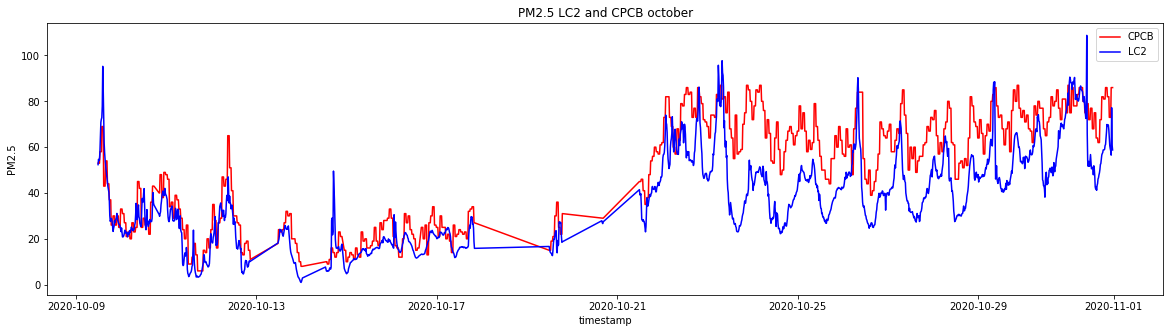

In [156]:
x = oct2['created_at']
y1 = oct2['PM2.5']
y2 = oct2['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB october')
plt.show()

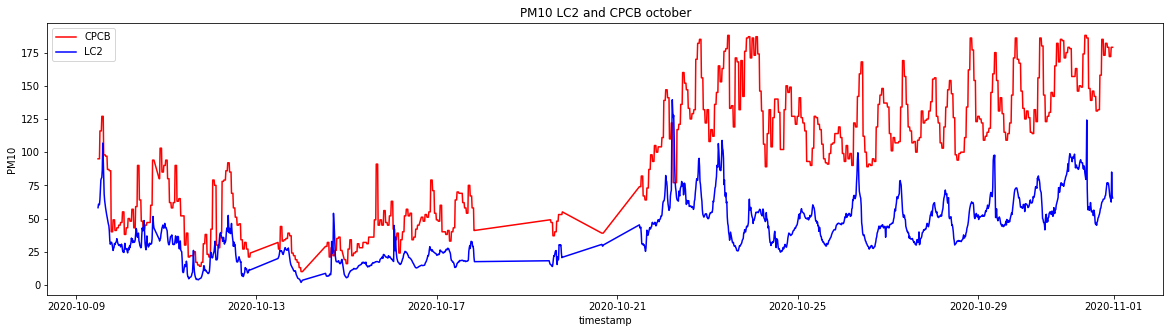

In [157]:
x = oct2['created_at']
y_1 = oct2['PM10']
y_2 = oct2['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_1, 'r') 
plt.plot(x, y_2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB october')
plt.show()

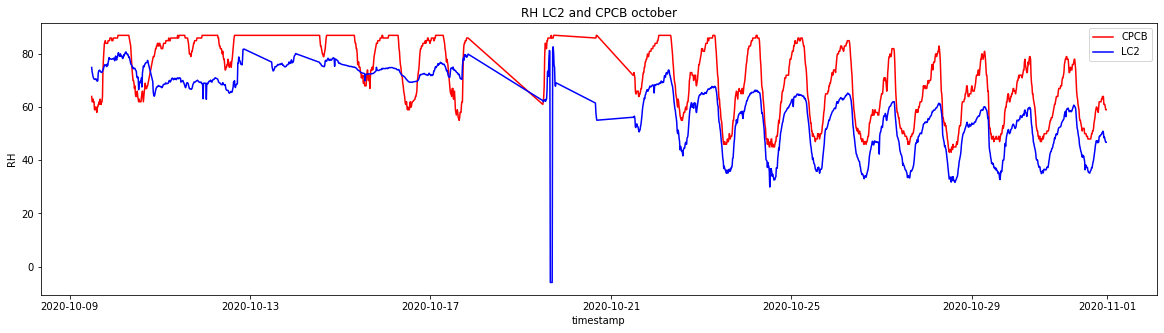

In [158]:

x = oct2['created_at']
y1_r = oct2['RH']
y2_r = oct2['RH_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1_r, 'r') 
plt.plot(x, y2_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('RH')
plt.legend(["CPCB", 'LC2'])
plt.title('RH LC2 and CPCB october')
plt.show()

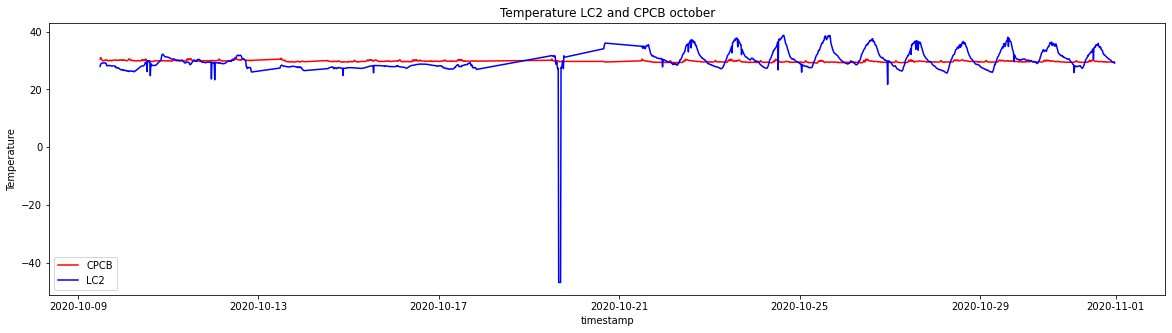

In [159]:
oct2_temp = oct2.dropna()
x = oct2_temp['created_at']
y1_t = oct2_temp['Temp']
y2_t = oct2_temp['Temperature_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1_t, 'r') 
plt.plot(x, y2_t, 'b') 
plt.xlabel('timestamp')
plt.ylabel('Temperature')
plt.legend(["CPCB", 'LC2'])
plt.title('Temperature LC2 and CPCB october')
plt.show()

max correlation is at lag 2
max correlation is  0.87
Pearsons correlation: 0.867
MSE PM2.5:  314.71354764397904
MAE PM2.5:  14.284979639325188
RMSE PM2.5:  17.740167632916524


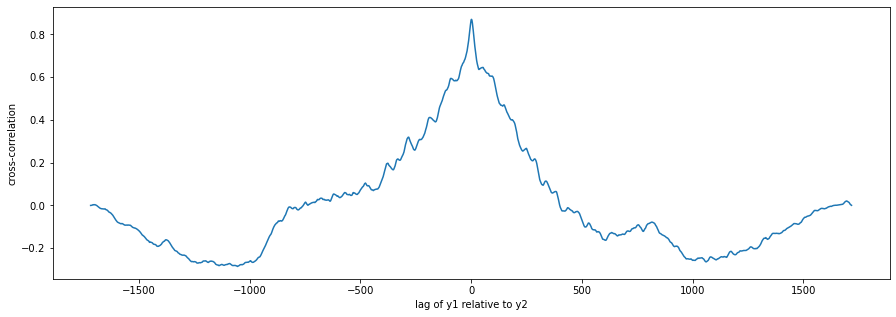

In [160]:
npts = len(oct2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y1, y2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct2['PM2.5_2'], oct2['PM2.5'])
MAE = mean_absolute_error(oct2['PM2.5_2'], oct2['PM2.5'])
print("MSE PM2.5: ", MSE)
print("MAE PM2.5: ", MAE)
print("RMSE PM2.5: ", np.sqrt(mean_squared_error(oct2['PM2.5_2'], oct2['PM2.5'])))

max correlation is at lag 2
max correlation is  0.794
Pearsons correlation: 0.789
MSE PM10:  4351.55722565445
MAE PM10:  56.501785922047695
RMSE PM10:  65.9663340322505


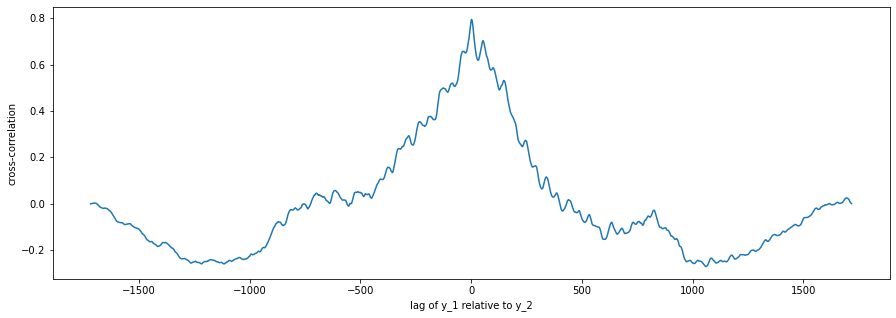

In [161]:
npts = len(oct2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_1 - y_1.mean(), y_2 - y_2.mean(), mode='full')
ccor = ccov / (npts * y_1.std() * y_2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_1 relative to y_2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_1, y_2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct2['PM10_2'], oct2['PM10'])
MAE = mean_absolute_error(oct2['PM10_2'], oct2['PM10'])
print("MSE PM10: ", MSE)
print("MAE PM10: ", MAE)
print("RMSE PM10: ", np.sqrt(mean_squared_error(oct2['PM10_2'], oct2['PM10'])))

## Simple Linear Regression '

Coefficients:  [[1.05905966]]
Intercept:  [11.14126686]
R2  0.7822751160882937
MAE of simple linear regression 9.23564982153133
MSE of simple linear regression 128.5556371154735
RMSE of simple linear regression 11.338237831139082
Test data Spearman correlation of simple linear regression: 0.918
Train data Spearman correlation of simple linear regression: 0.894
Mean Absolute Error Random Forest: 8.39423647469459
Mean Squared Error Random Forest: 130.09140326497965
Root Mean Squared Error Random Forest: 11.40576184500534
Test data R-2 score Random Forest:  0.78
Test data Spearman correlation Random Forest: 0.872


<ipython-input-162-389d2e9c45a7>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


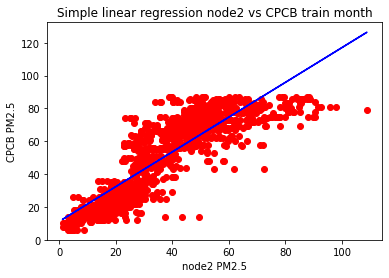

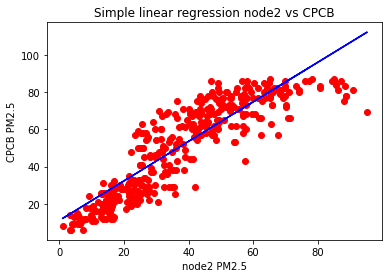

In [162]:
msk = (np.random.rand(len(oct2)) < 0.8)
train = oct2[msk]
test = oct2[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_2']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_2']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [163]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 1.49823188 -0.39588046]]
Intercept:  [11.16426185]
R2  0.784987015014819
MAE  9.15425193220365
MSE  126.95439665077022
RMSE  11.267404166478196
variance score = 0.7884102534139197
Test data Spearman correlation: 0.92
Mean Absolute Error Random Forest: 7.600610820244328
Mean Squared Error Random Forest: 107.73060209424082
Root Mean Squared Error Random Forest: 10.379335339714235
Test data R-2 score Random Forest: 0.818
Test data Spearman correlation Random Forest: 0.896


<ipython-input-163-99ab4e77ba12>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [164]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.92252019 -0.57515054]]
Intercept:  [50.83561598]
R2  0.8797894503772208
MAE  6.654255328944807
MSE  70.97830765648526
RMSE  8.424862471072466
variance score = 0.8818694781344026
Test data Spearman correlation: 0.934
Mean Absolute Error Random Forest: 5.207853403141361
Mean Squared Error Random Forest: 48.99225130890053
Root Mean Squared Error Random Forest: 6.99944650018132
Test data R-2 score Random Forest: 0.917
Test data Spearman correlation Random Forest: 0.942


<ipython-input-164-5913e91b0b73>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [165]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2','RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2','RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.97213137 -0.0443545  -0.57343926]]
Intercept:  [50.72008725]
R2  0.8797630165134362
MAE  6.649451466622502
MSE  70.99391552885697
RMSE  8.42578871850327
variance score = 0.8818388687937387
Test data Spearman correlation: 0.934
Mean Absolute Error Random Forest: 5.342931937172775
Mean Squared Error Random Forest: 50.12314136125654
Root Mean Squared Error Random Forest: 7.0797698664050195
Test data R-2 score Random Forest: 0.915
Test data Spearman correlation Random Forest: 0.942


<ipython-input-165-7f050ed566fa>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [305]:
oct2['time'] = oct2['created_at'].dt.time

In [306]:
oct2

created_at  PM10  PM2.5  RH  Temp  PM10_2  PM2.5_2   RH_2  \
0    2020-10-09 11:45:00    95     53  64  30.5   58.17    52.37  74.91   
1    2020-10-09 12:00:00    95     53  62  30.9   60.80    54.68  73.25   
2    2020-10-09 12:15:00    95     53  62  31.0   60.22    54.14  72.23   
3    2020-10-09 12:30:00    95     53  63  30.6   60.48    54.48  71.39   
4    2020-10-09 12:45:00   116     58  62  30.3   64.50    58.11  70.92   
...                  ...   ...    ...  ..   ...     ...      ...    ...   
1714 2020-10-31 22:30:00   172     73  61  29.5   64.52    58.39  48.76   
1715 2020-10-31 22:45:00   179     86  61  29.5   62.41    56.52  48.13   
1716 2020-10-31 23:00:00   179     86  60  29.4   85.03    77.21  47.25   
1717 2020-10-31 23:15:00   179     86  59  29.4   67.38    60.83  46.75   
1718 2020-10-31 23:30:00   179     86  59  29.5   65.46    58.77  46.75   

      Temperature_2      time  
0             27.95  11:45:00  
1             28.59  12:00:00  
2             28.83  12:15:00  
3             29.10  12:30:00  
4             29.07  12:45:00  
...             ...       ...  
1714          29.52  22:30:00  
1715          29.39  22:45:00  
1716          29.27  23:00:00  
1717          29.25  23:15:00  
1718          29.14  23:30:00  

[1719 rows x 10 columns]

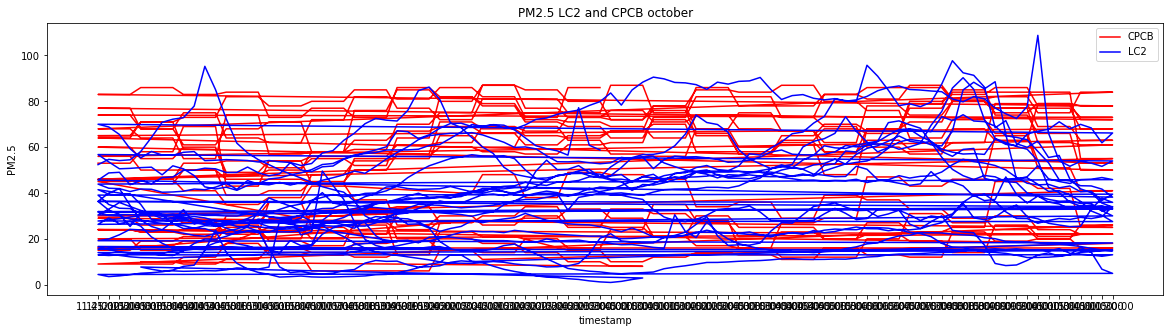

In [313]:
x = oct2['time']
#y1_T = oct2['PM2.5']
y2_T = oct2['PM2.5_2']
fig= plt.figure(figsize=(20,5))
#plt.plot(x, y1_T, 'r') 
plt.plot(x, y2_T, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
#plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB october')
plt.show()

In [309]:
datatypes = oct2.dtypes 
  
# Print the data types 
# of each column 
datatypes

created_at       datetime64[ns]
PM10                      int64
PM2.5                     int64
RH                        int64
Temp                    float64
PM10_2                  float64
PM2.5_2                 float64
RH_2                    float64
Temperature_2           float64
time                     object
dtype: object

In [311]:
oct2['time'] = oct2['time'].astype(str) 

 ## Removing values with RH > 75

In [166]:
oct2_rh = oct2[oct2['RH_2'] < 75]

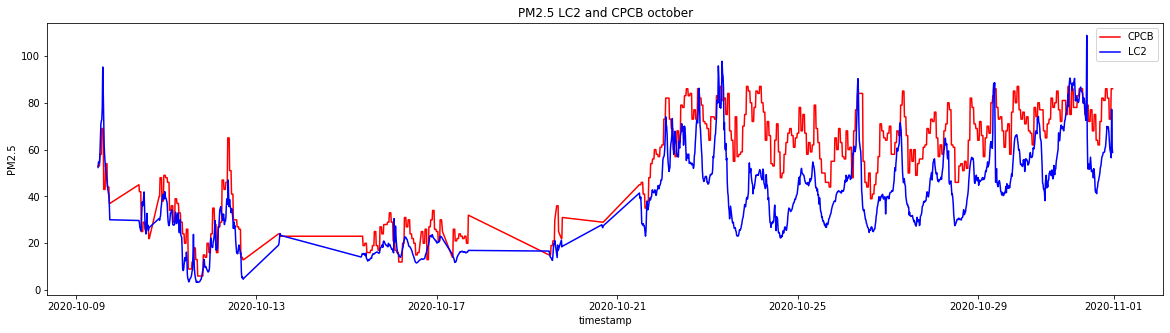

In [167]:
x = oct2_rh['created_at']
y11 = oct2_rh['PM2.5']
y22 = oct2_rh['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y11, 'r') 
plt.plot(x, y22, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB october')
plt.show()

max correlation is at lag 2
max correlation is  0.851
Pearsons correlation: 0.847
MSE:  358.9029822690217
MAE:  15.740264945652173
RMSE  18.944734948502756


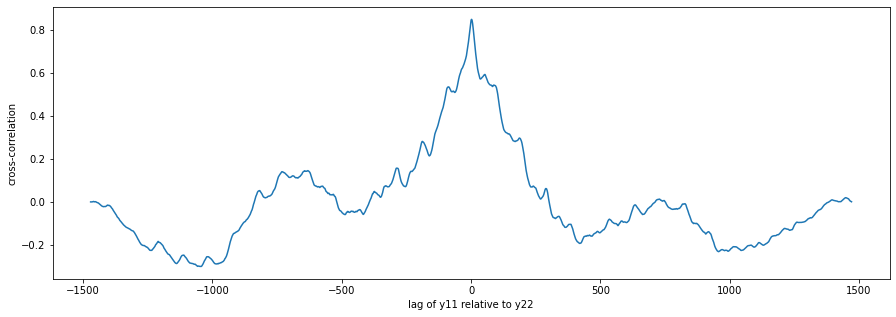

In [168]:
npts = len(oct2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y11 - y11.mean(), y22 - y22.mean(), mode='full')
ccor = ccov / (npts * y11.std() * y22.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y11 relative to y22')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y11, y22) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct2_rh['PM2.5_2'], oct2_rh['PM2.5'])
MAE = mean_absolute_error(oct2_rh['PM2.5_2'], oct2_rh['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(oct2_rh['PM2.5_2'], oct2_rh['PM2.5'])))

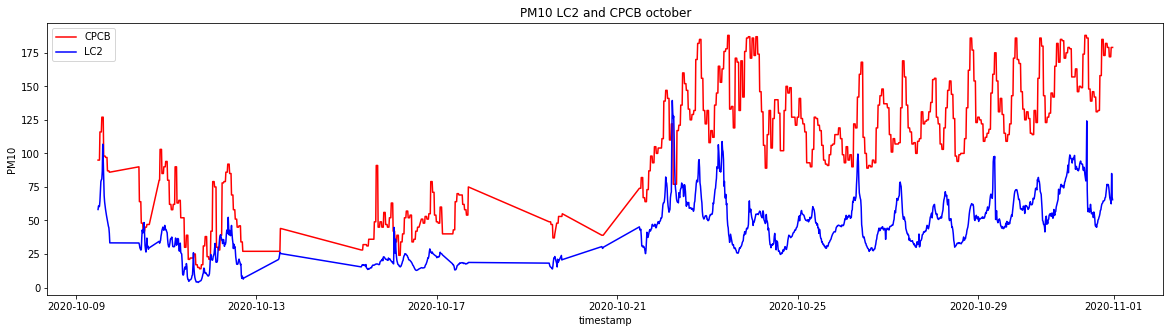

In [169]:
x = oct2_rh['created_at']
y1_1 = oct2_rh['PM10']
y2_2 = oct2_rh['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1_1, 'r') 
plt.plot(x, y2_2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB october')
plt.show()

max correlation is at lag 2
max correlation is  0.759
Pearsons correlation: 0.751
MSE:  5013.683326154892
MAE:  63.06228940217392
RMSE  70.80736773920417


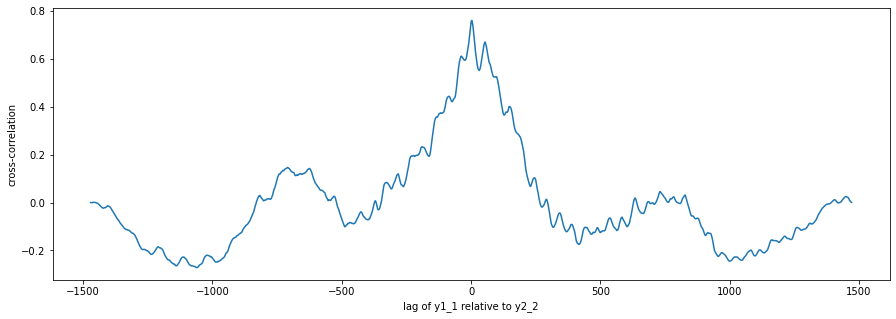

In [170]:
npts = len(oct2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1_1 - y1_1.mean(), y2_2 - y2_2.mean(), mode='full')
ccor = ccov / (npts * y1_1.std() * y2_2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1_1 relative to y2_2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y1_1, y2_2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct2_rh['PM10_2'], oct2_rh['PM10'])
MAE = mean_absolute_error(oct2_rh['PM10_2'], oct2_rh['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(oct2_rh['PM10_2'], oct2_rh['PM10'])))

## Simple Linear Regression and Random Forest

Coefficients:  [[0.99486242]]
Intercept:  [15.01231255]
R2  0.699590073518491
MAE of simple linear regression 10.311533512300828
MSE of simple linear regression 156.08668155382176
RMSE of simple linear regression 12.493465554193591
Test data Spearman correlation of simple linear regression: 0.864
Train data Spearman correlation of simple linear regression: 0.871
Mean Absolute Error Random Forest: 8.114242841831265
Mean Squared Error Random Forest: 116.54046302578911
Root Mean Squared Error Random Forest: 10.795390823207333
Test data R-2 score Random Forest: 0.776
Test data Spearman correlation Random Forest: 0.826


<ipython-input-171-4b3ee8463f52>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


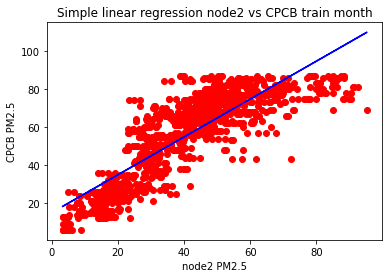

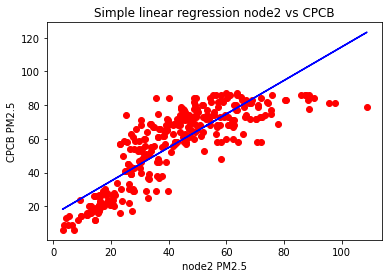

In [171]:
msk = (np.random.rand(len(oct2_rh)) < 0.8)
train = oct2_rh[msk]
test = oct2_rh[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_2']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_2']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [172]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 1.32304806 -0.29582589]]
Intercept:  [14.99133732]
R2  0.7036727290246708
MAE  10.201522924996446
MSE  153.96541959237234
RMSE  12.40828028343865
variance score = 0.7040774064249474
Test data Spearman correlation: 0.868
Mean Absolute Error Random Forest: 7.7241371918542345
Mean Squared Error Random Forest: 108.50328417291891
Root Mean Squared Error Random Forest: 10.41649097215175
Test data R-2 score Random Forest: 0.791
Test data Spearman correlation Random Forest: 0.834


<ipython-input-172-99ab4e77ba12>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [173]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2','RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2','RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.96414311 -0.03494816 -0.52165481]]
Intercept:  [47.74248863]
R2  0.8159577026598757
MAE  7.787883837013882
MSE  95.62450813065917
RMSE  9.778778458000732
variance score = 0.816064185251747
Test data Spearman correlation: 0.887
Mean Absolute Error Random Forest: 5.404180064308681
Mean Squared Error Random Forest: 51.54749196141479
Root Mean Squared Error Random Forest: 7.179658206447908
Test data R-2 score Random Forest: 0.901
Test data Spearman correlation Random Forest: 0.911


<ipython-input-173-7f050ed566fa>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


## November 

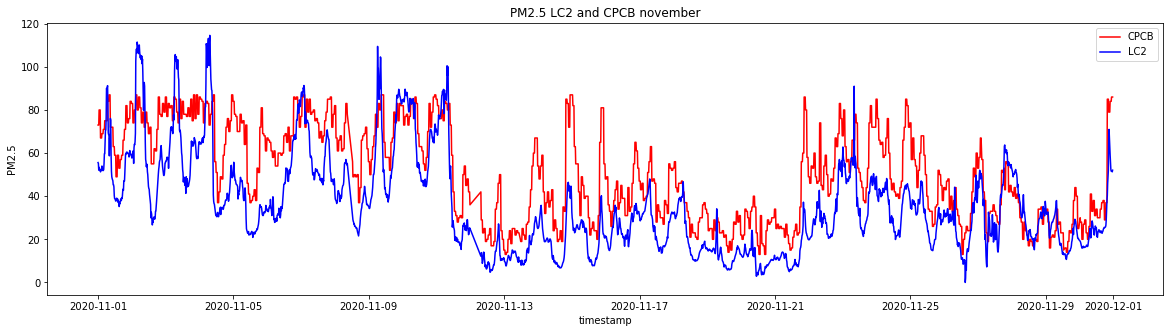

In [192]:
x = nov2['created_at']
y3 = nov2['PM2.5']
y4 = nov2['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3, 'r') 
plt.plot(x, y4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB november')
plt.show()

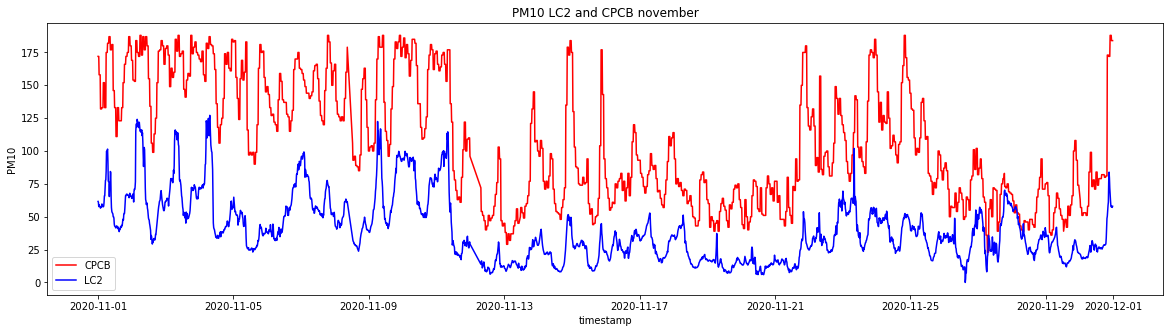

In [193]:
x = nov2['created_at']
y_3 = nov2['PM10']
y_4 = nov2['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_3, 'r') 
plt.plot(x, y_4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB november')
plt.show()

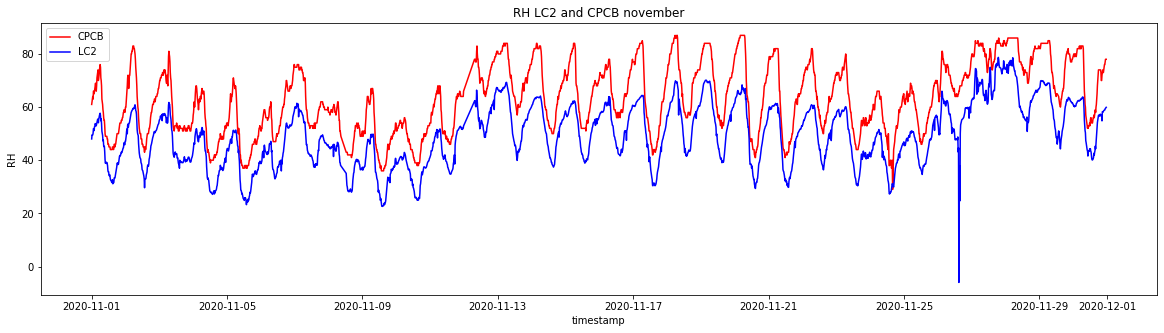

In [194]:
x = nov2['created_at']
y3_r = nov2['RH']
y4_r = nov2['RH_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_r, 'r') 
plt.plot(x, y4_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('RH')
plt.legend(["CPCB", 'LC2'])
plt.title('RH LC2 and CPCB november')
plt.show()

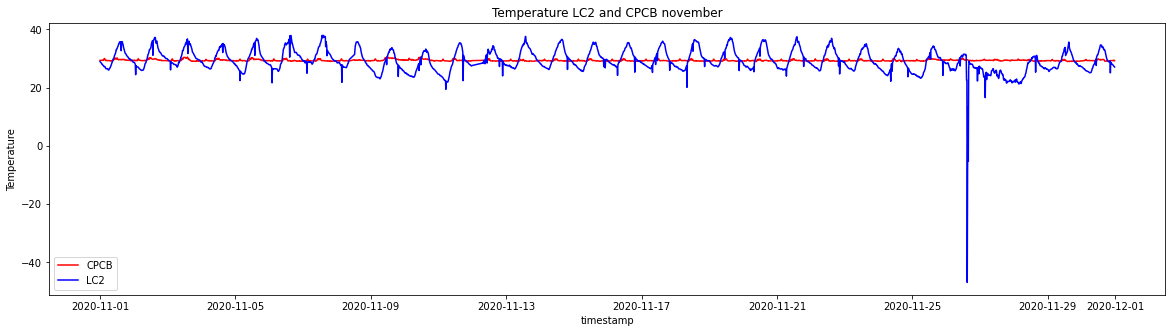

In [195]:
x = nov2['created_at']
y3_t = nov2['Temp']
y4_t = nov2['Temperature_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_t, 'r') 
plt.plot(x, y4_t, 'b') 
plt.xlabel('timestamp')
plt.ylabel('Temperature')
plt.legend(["CPCB", 'LC2'])
plt.title('Temperature LC2 and CPCB november')
plt.show()

max correlation is at lag 2
max correlation is  0.831
Pearsons correlation: 0.825
MSE:  394.249689740859
MAE:  17.09357472488463
RMSE  19.855721838826685


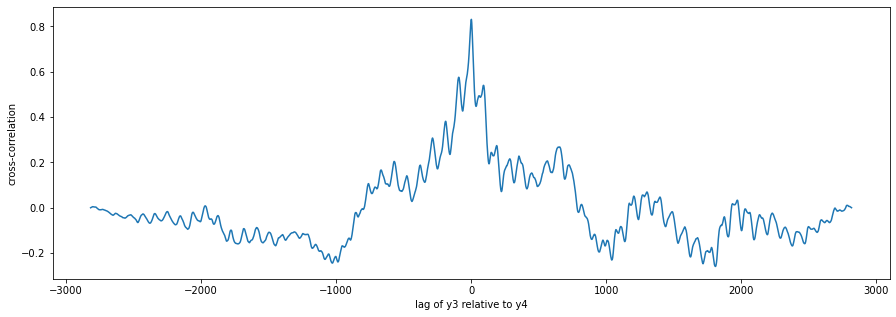

In [196]:
npts = len(nov2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y3 - y3.mean(), y4 - y4.mean(), mode='full')
ccor = ccov / (npts * y3.std() * y4.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y3 relative to y4')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y3, y4) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov2['PM2.5_2'], nov2['PM2.5'])
MAE = mean_absolute_error(nov2['PM2.5_2'], nov2['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov2['PM2.5_2'], nov2['PM2.5'])))

max correlation is at lag 2
max correlation is  0.799
Pearsons correlation: 0.793
MSE:  5329.1797568335105
MAE:  66.32218672346468
RMSE  73.00123120080586


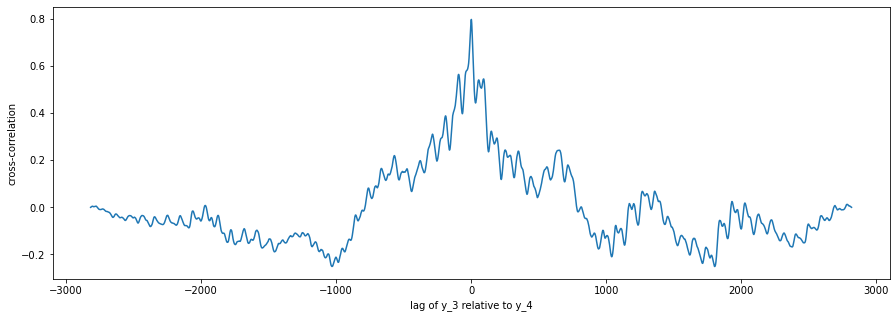

In [197]:
npts = len(nov2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_3 - y_3.mean(), y_4 - y_4.mean(), mode='full')
ccor = ccov / (npts * y_3.std() * y_4.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_3 relative to y_4')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_3, y_4) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov2['PM10_2'], nov2['PM10'])
MAE = mean_absolute_error(nov2['PM10_2'], nov2['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov2['PM10_2'], nov2['PM10'])))

Coefficients:  [[0.81645586]]
Intercept:  [21.63870248]
R2  0.7057146513513709
MAE of simple linear regression 9.372014842146525
MSE of simple linear regression 138.535045260594
RMSE of simple linear regression 11.770091132212784
Test data Spearman correlation of simple linear regression: 0.891
Train data Spearman correlation of simple linear regression: 0.876
Mean Absolute Error Random Forest: 8.52531831370541
Mean Squared Error Random Forest: 137.3608807758109
Root Mean Squared Error Random Forest: 11.720105834667658
Test data R-2 score Random Forest: 0.708
Test data Spearman correlation Random Forest: 0.846


<ipython-input-207-dd301abe7604>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


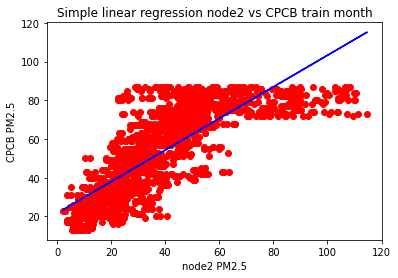

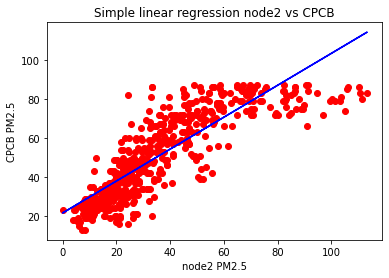

In [207]:
msk = (np.random.rand(len(nov2)) < 0.8)
train = nov2[msk]
test = nov2[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_2']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_2']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [208]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[-1.03907713  1.69217339]]
Intercept:  [20.23146672]
R2  0.7170237185691146
MAE  9.2015401596785
MSE  133.21129351399972
RMSE  11.541719694828831
variance score = 0.7178703877494311
Test data Spearman correlation: 0.904
Mean Absolute Error Random Forest: 7.387514934289128
Mean Squared Error Random Forest: 100.42150736758263
Root Mean Squared Error Random Forest: 10.021053206503927
Test data R-2 score Random Forest: 0.787
Test data Spearman correlation Random Forest: 0.881


<ipython-input-208-99ab4e77ba12>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [210]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.80605444 -0.35595462]]
Intercept:  [39.59990707]
R2  0.7409726825328287
MAE  8.796912692959143
MSE  121.93730103733446
RMSE  11.042522403750624
variance score = 0.7417568804109266
Test data Spearman correlation: 0.897
Mean Absolute Error Random Forest: 5.568458781362008
Mean Squared Error Random Forest: 60.738387096774204
Root Mean Squared Error Random Forest: 7.793483630365448
Test data R-2 score Random Forest: 0.871
Test data Spearman correlation Random Forest: 0.925


<ipython-input-210-5913e91b0b73>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [209]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2','RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2','RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[-0.56022302  1.24647883 -0.33766782]]
Intercept:  [37.64057889]
R2  0.7480231327323202
MAE  8.677000026335605
MSE  118.61829639786014
RMSE  10.891202706673866
variance score = 0.7488834479125317
Test data Spearman correlation: 0.907
Mean Absolute Error Random Forest: 5.2663082437275985
Mean Squared Error Random Forest: 51.215376344086025
Root Mean Squared Error Random Forest: 7.1564919020485185
Test data R-2 score Random Forest: 0.891
Test data Spearman correlation Random Forest: 0.935


<ipython-input-209-7f050ed566fa>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


## Removing the values with RH > 75 in November

In [198]:
nov2_rh = nov2[nov2['RH_2'] < 75]

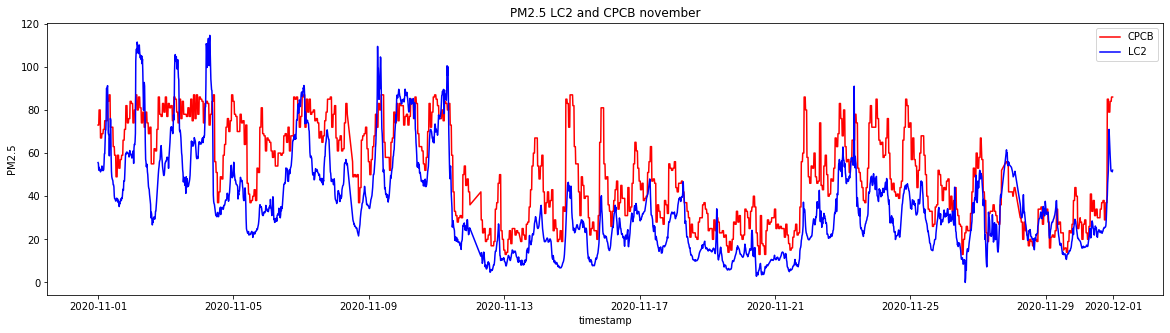

In [199]:
x = nov2_rh['created_at']
y33 = nov2_rh['PM2.5']
y44 = nov2_rh['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y33, 'r') 
plt.plot(x, y44, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB november')
plt.show()

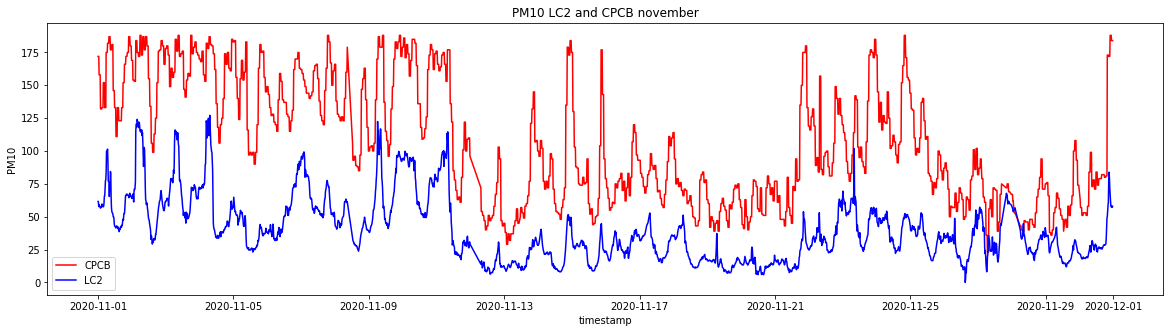

In [200]:
x = nov2_rh['created_at']
y3_3 = nov2_rh['PM10']
y4_4 = nov2_rh['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_3, 'r') 
plt.plot(x, y4_4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB november')
plt.show()

max correlation is at lag 2
max correlation is  0.836
Pearsons correlation: 0.830
MSE:  397.75319210053857
MAE:  17.196172351885096
RMSE  19.943750702927936


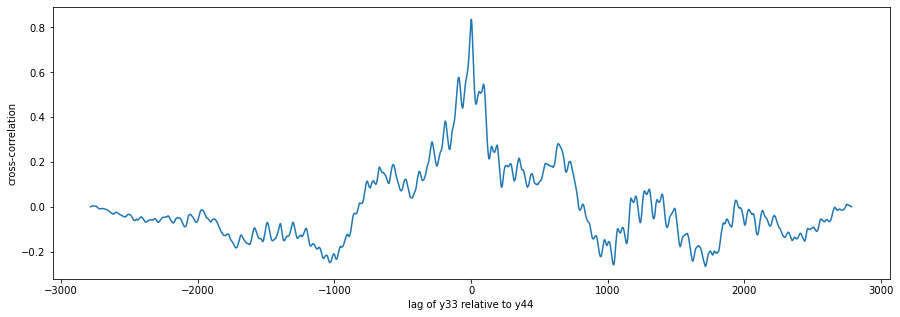

In [201]:
npts = len(nov2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y33 - y33.mean(), y44 - y44.mean(), mode='full')
ccor = ccov / (npts * y33.std() * y44.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y33 relative to y44')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y33, y44) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov2_rh['PM2.5_2'], nov2_rh['PM2.5'])
MAE = mean_absolute_error(nov2_rh['PM2.5_2'], nov2_rh['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov2_rh['PM2.5_2'], nov2_rh['PM2.5'])))

max correlation is at lag 2
max correlation is  0.811
Pearsons correlation: 0.805
MSE:  5388.3906721723515
MAE:  66.97001077199282
RMSE  73.40565831168843


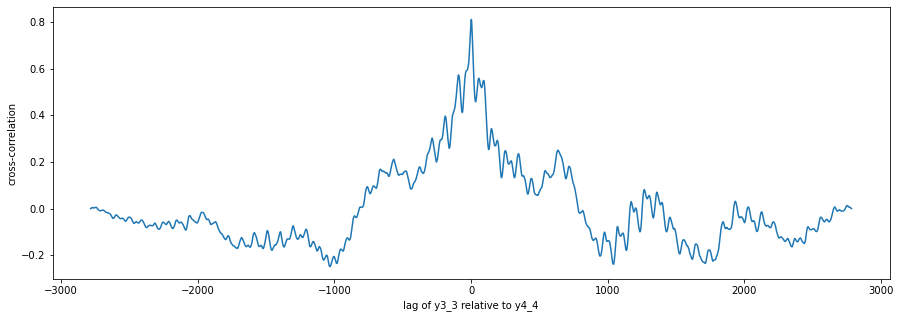

In [202]:
npts = len(nov2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y3_3 - y3_3.mean(), y4_4 - y4_4.mean(), mode='full')
ccor = ccov / (npts * y3_3.std() * y4_4.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y3_3 relative to y4_4')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y3_3, y4_4) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov2_rh['PM10_2'], nov2_rh['PM10'])
MAE = mean_absolute_error(nov2_rh['PM10_2'], nov2_rh['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov2_rh['PM10_2'], nov2_rh['PM10'])))

Coefficients:  [[0.80990939]]
Intercept:  [21.88509104]
R2  0.6909837268979336
MAE of simple linear regression 9.636326879141546
MSE of simple linear regression 151.15394011862514
RMSE of simple linear regression 12.294467866427775
Test data Spearman correlation of simple linear regression: 0.883
Train data Spearman correlation of simple linear regression: 0.887
Mean Absolute Error Random Forest: 9.050610868448098
Mean Squared Error Random Forest: 151.0718660580974
Root Mean Squared Error Random Forest: 12.29112956802984
Test data R-2 score Random Forest: 0.691
Test data Spearman correlation Random Forest: 0.833


<ipython-input-211-0905084a74ec>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


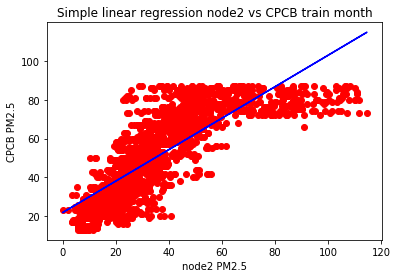

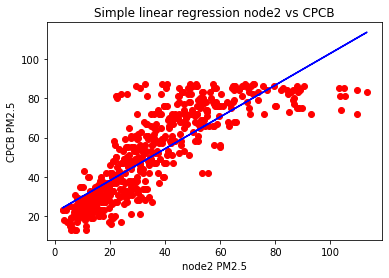

In [211]:
msk = (np.random.rand(len(nov2_rh)) < 0.8)
train = nov2_rh[msk]
test = nov2_rh[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_2']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_2']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [212]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[-0.96696826  1.61988096]]
Intercept:  [20.51651235]
R2  0.6984419884529155
MAE  9.550788896148857
MSE  147.50576454148194
RMSE  12.145195121589522
variance score = 0.6990047513267746
Test data Spearman correlation: 0.892
Mean Absolute Error Random Forest: 7.682059352517984
Mean Squared Error Random Forest: 117.13734824640288
Root Mean Squared Error Random Forest: 10.823000889143588
Test data R-2 score Random Forest: 0.761
Test data Spearman correlation Random Forest: 0.871


<ipython-input-212-99ab4e77ba12>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [213]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.79736687 -0.32111333]]
Intercept:  [38.11877325]
R2  0.7275319744632067
MAE  8.896362615487709
MSE  133.27652684046654
RMSE  11.544545328442629
variance score = 0.727697796223889
Test data Spearman correlation: 0.895
Mean Absolute Error Random Forest: 5.682733812949641
Mean Squared Error Random Forest: 64.61629496402878
Root Mean Squared Error Random Forest: 8.038426149690546
Test data R-2 score Random Forest: 0.868
Test data Spearman correlation Random Forest: 0.924


<ipython-input-213-5913e91b0b73>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [214]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2','RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2','RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[-0.6166553   1.28972368 -0.30319709]]
Intercept:  [36.12338815]
R2  0.7310138019806309
MAE  8.852173969933558
MSE  131.57340634526108
RMSE  11.470545163385264
variance score = 0.7313270074829687
Test data Spearman correlation: 0.901
Mean Absolute Error Random Forest: 5.494964028776978
Mean Squared Error Random Forest: 61.81338129496404
Root Mean Squared Error Random Forest: 7.8621486436574095
Test data R-2 score Random Forest: 0.874
Test data Spearman correlation Random Forest: 0.929


<ipython-input-214-7f050ed566fa>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


## December

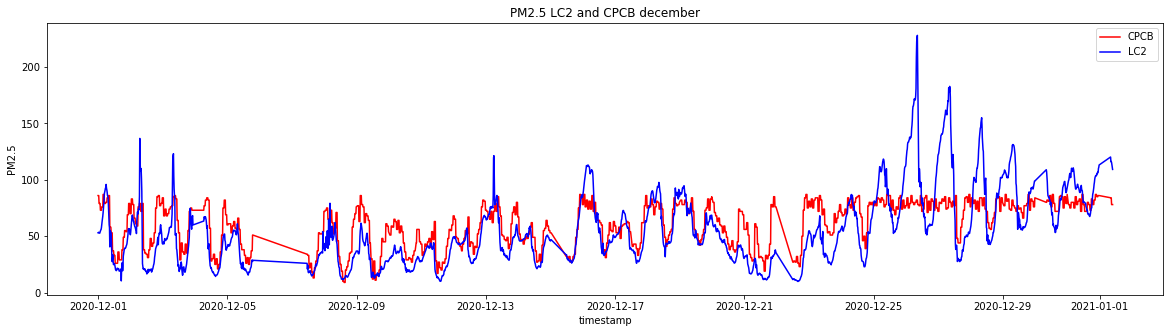

In [215]:
x = dec2['created_at']
y5 = dec2['PM2.5']
y6 = dec2['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5, 'r') 
plt.plot(x, y6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB december')
plt.show()

max correlation is at lag 1
max correlation is  0.731
Pearsons correlation: 0.729
MSE:  550.9889549354594
MAE:  17.66954821564161
RMSE  23.47315391964743


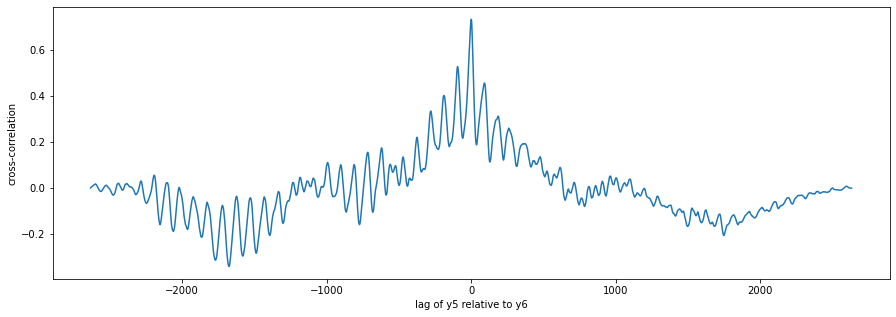

In [216]:
npts = len(dec2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y5 - y5.mean(), y6 - y6.mean(), mode='full')
ccor = ccov / (npts * y5.std() * y6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y5 relative to y6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y5, y6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec2['PM2.5_2'], dec2['PM2.5'])
MAE = mean_absolute_error(dec2['PM2.5_2'], dec2['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec2['PM2.5_2'], dec2['PM2.5'])))

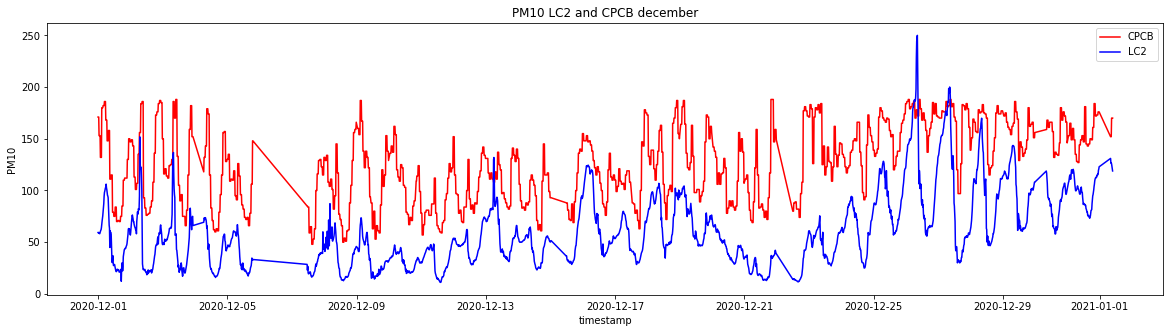

In [217]:
x = dec2['created_at']
y_5 = dec2['PM10']
y_6 = dec2['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_5, 'r') 
plt.plot(x, y_6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB december')
plt.show()

max correlation is at lag 2
max correlation is  0.71
Pearsons correlation: 0.707
MSE:  5012.7728871678055
MAE:  65.58338648443433
RMSE  70.80093846247948


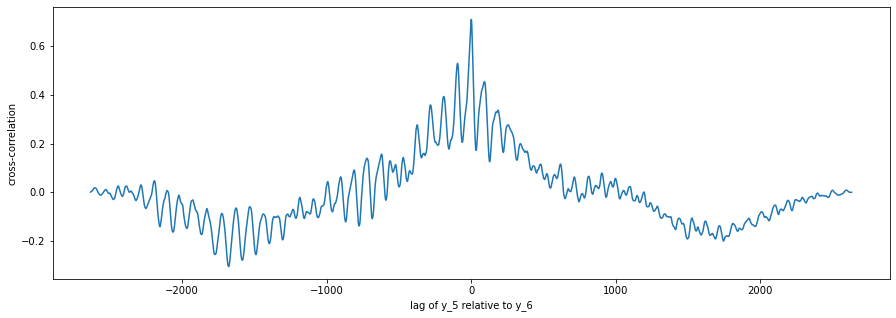

In [218]:
npts = len(dec2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_5 - y_5.mean(), y_6 - y_6.mean(), mode='full')
ccor = ccov / (npts * y_5.std() * y_6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_5 relative to y_6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_5, y_6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec2['PM10_2'], dec2['PM10'])
MAE = mean_absolute_error(dec2['PM10_2'], dec2['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec2['PM10_2'], dec2['PM10'])))

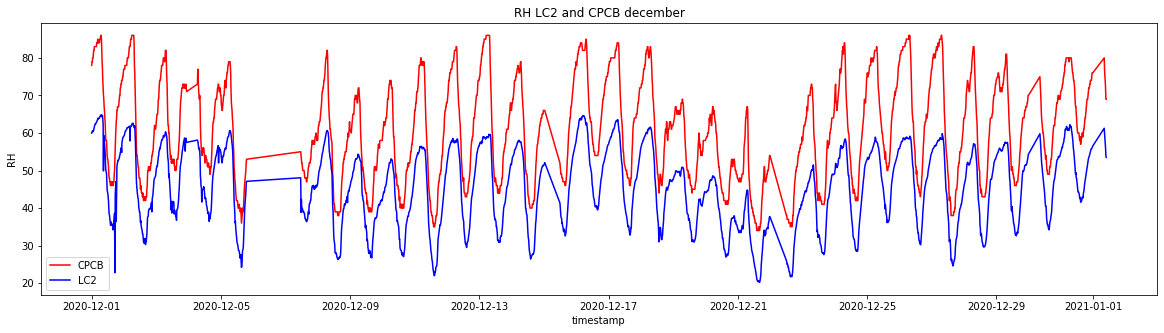

In [219]:
x = dec2['created_at']
y5_r = dec2['RH']
y6_r = dec2['RH_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5_r, 'r') 
plt.plot(x, y6_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('RH')
plt.legend(["CPCB", 'LC2'])
plt.title('RH LC2 and CPCB december')
plt.show()

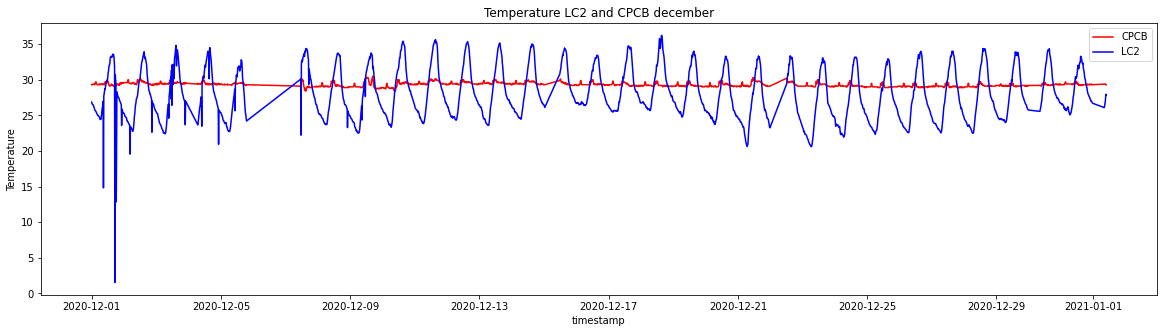

In [220]:
x = dec2['created_at']
y5_t = dec2['Temp']
y6_t = dec2['Temperature_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5_t, 'r') 
plt.plot(x, y6_t, 'b') 
plt.xlabel('timestamp')
plt.ylabel('Temperature')
plt.legend(["CPCB", 'LC2'])
plt.title('Temperature LC2 and CPCB december')
plt.show()

Coefficients:  [[0.4291579]]
Intercept:  [37.18891523]
R2  0.538902566381934
MAE of simple linear regression 10.983638522026519
MSE of simple linear regression 178.25994658167915
RMSE of simple linear regression 13.351402420033603
Test data Spearman correlation of simple linear regression: 0.819
Train data Spearman correlation of simple linear regression: 0.83
Mean Absolute Error Random Forest: 9.141526682247541
Mean Squared Error Random Forest: 141.40337177128688
Root Mean Squared Error Random Forest: 11.891314972335351
Test data R-2 score Random Forest: 0.634
Test data Spearman correlation Random Forest: 0.738


<ipython-input-221-ea7f74b02b91>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


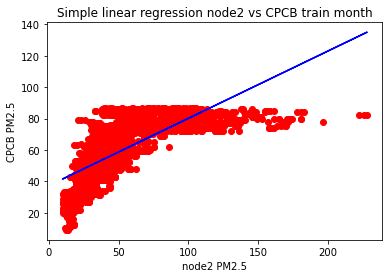

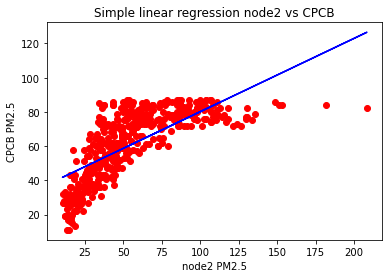

In [221]:
msk = (np.random.rand(len(dec2)) < 0.8)
train = dec2[msk]
test = dec2[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_2']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_2']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [222]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[-2.00341208  2.24136862]]
Intercept:  [35.45918121]
R2  0.5504621658861688
MAE  10.800557770025359
MSE  173.7910134671276
RMSE  13.182981964150889
variance score = 0.5531321016589823
Test data Spearman correlation: 0.829
Mean Absolute Error Random Forest: 7.725971370143149
Mean Squared Error Random Forest: 96.66629856850716
Root Mean Squared Error Random Forest: 9.83190208293935
Test data R-2 score Random Forest:  0.75
Test data Spearman correlation Random Forest: 0.801


<ipython-input-222-99ab4e77ba12>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [223]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.35924126 0.33445198]]
Intercept:  [25.87271674]
R2  0.5493631148544107
MAE  10.821036843840995
MSE  174.21590583027623
RMSE  13.199087310502808
variance score = 0.5505510579354302
Test data Spearman correlation: 0.77
Mean Absolute Error Random Forest: 6.979959100204499
Mean Squared Error Random Forest: 91.9164008179959
Root Mean Squared Error Random Forest: 9.587304147569112
Test data R-2 score Random Forest: 0.762
Test data Spearman correlation Random Forest: 0.826


<ipython-input-223-5913e91b0b73>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [224]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2','RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2','RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[-1.73493301  1.93355082  0.31379017]]
Intercept:  [25.07962856]
R2  0.5574902836529088
MAE  10.699368097350044
MSE  171.07394803512486
RMSE  13.079523998797695
variance score = 0.5588898392701029
Test data Spearman correlation: 0.781
Mean Absolute Error Random Forest: 6.54601226993865
Mean Squared Error Random Forest: 74.08961145194276
Root Mean Squared Error Random Forest: 8.607532250996377
Test data R-2 score Random Forest: 0.808
Test data Spearman correlation Random Forest: 0.848


<ipython-input-224-7f050ed566fa>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


## Removing values RH > 75

In [225]:
dec2_rh = dec2[dec2['RH_2'] < 75]

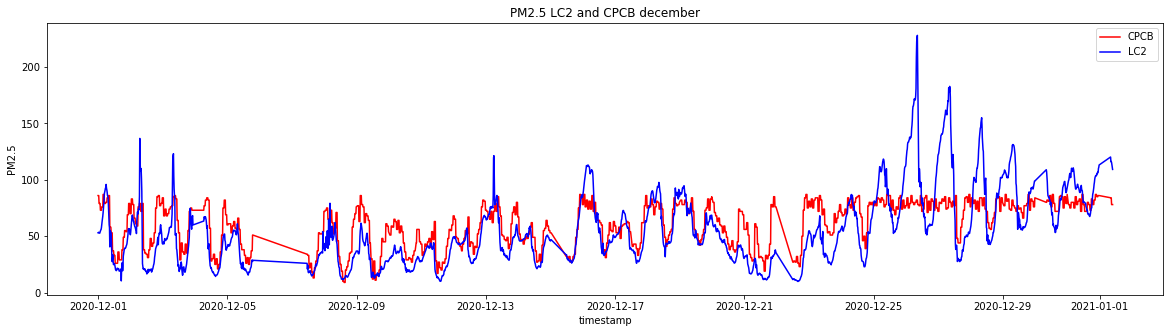

In [226]:
x = dec2_rh['created_at']
y55 = dec2_rh['PM2.5']
y66 = dec2_rh['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y55, 'r') 
plt.plot(x, y66, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB december')
plt.show()

max correlation is at lag 1
max correlation is  0.731
Pearsons correlation: 0.729
MSE:  550.9889549354594
MAE:  17.66954821564161
RMSE  23.47315391964743


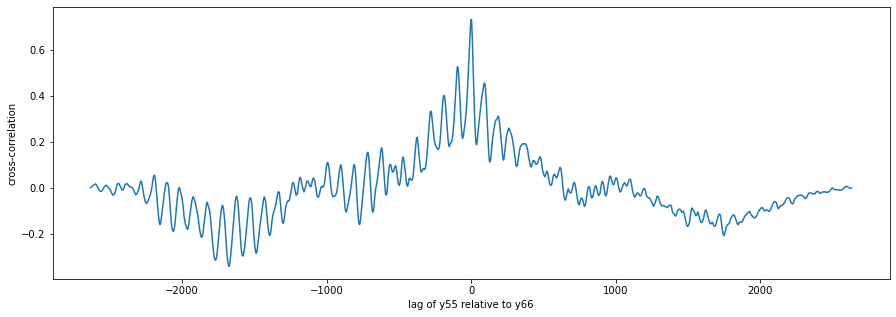

In [227]:
npts = len(dec2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y55 - y55.mean(), y66 - y66.mean(), mode='full')
ccor = ccov / (npts * y55.std() * y66.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y55 relative to y66')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y55, y66) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec2_rh['PM2.5_2'], dec2_rh['PM2.5'])
MAE = mean_absolute_error(dec2_rh['PM2.5_2'], dec2_rh['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec2_rh['PM2.5_2'], dec2_rh['PM2.5'])))

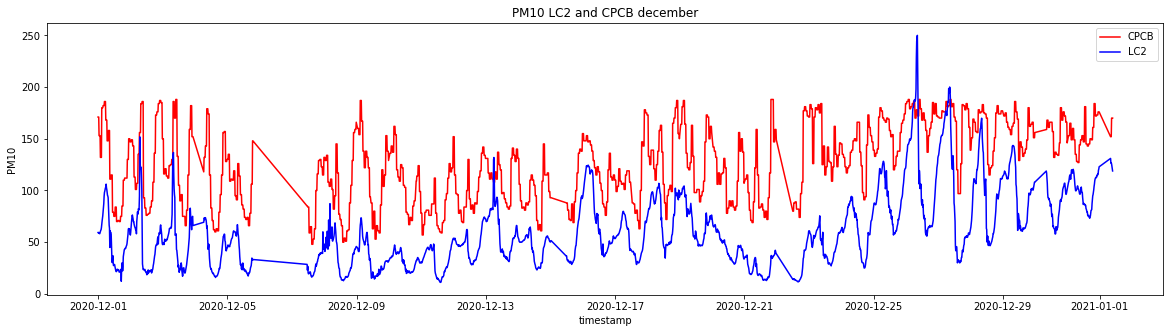

In [228]:
x = dec2_rh['created_at']
y5_5 = dec2_rh['PM10']
y6_6 = dec2_rh['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5_5, 'r') 
plt.plot(x, y6_6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB december')
plt.show()

max correlation is at lag 2
max correlation is  0.71
Pearsons correlation: 0.707
MSE:  5012.7728871678055
MAE:  65.58338648443433
RMSE  70.80093846247948


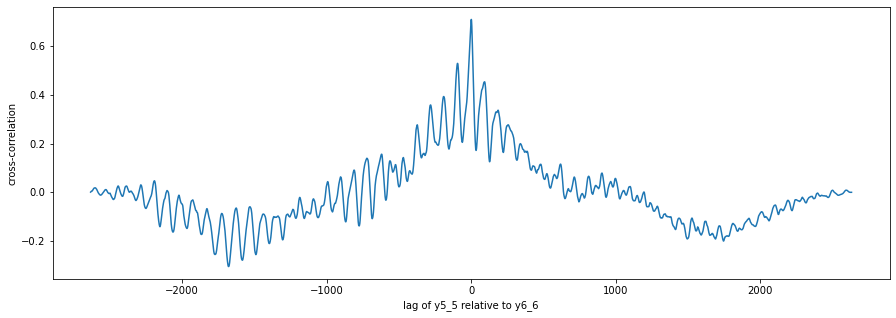

In [229]:
npts = len(dec2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y5_5 - y5_5.mean(), y6_6 - y6_6.mean(), mode='full')
ccor = ccov / (npts * y5_5.std() * y6_6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y5_5 relative to y6_6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y5_5, y6_6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec2_rh['PM10_2'], dec2_rh['PM10'])
MAE = mean_absolute_error(dec2_rh['PM10_2'], dec2_rh['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec2_rh['PM10_2'], dec2_rh['PM10'])))

Coefficients:  [[0.454776]]
Intercept:  [36.00874732]
R2  0.48481593228184394
MAE of simple linear regression 11.037388998302296
MSE of simple linear regression 188.393669943486
RMSE of simple linear regression 13.725657359248263
Test data Spearman correlation of simple linear regression: 0.823
Train data Spearman correlation of simple linear regression: 0.829
Mean Absolute Error Random Forest: 8.410217155742988
Mean Squared Error Random Forest: 124.7759479581261
Root Mean Squared Error Random Forest: 11.170315481584488
Test data R-2 score Random Forest: 0.659
Test data Spearman correlation Random Forest: 0.759


<ipython-input-230-8c78969f27dc>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


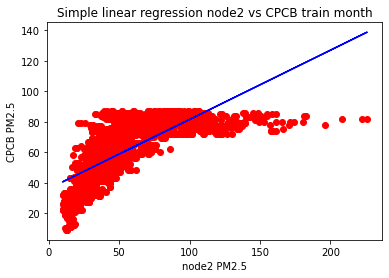

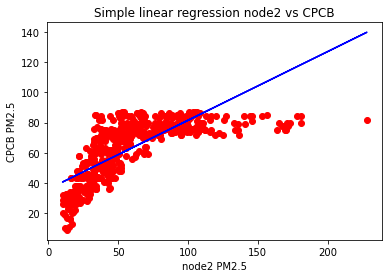

In [230]:
msk = (np.random.rand(len(dec2_rh)) < 0.8)
train = dec2_rh[msk]
test = dec2_rh[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_2']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_2']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [231]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[-2.08618788  2.34061311]]
Intercept:  [34.27055832]
R2  0.4985053560276801
MAE  10.778150549777028
MSE  183.38769064309255
RMSE  13.542071135653238
variance score = 0.4988894447630877
Test data Spearman correlation: 0.831
Mean Absolute Error Random Forest: 7.561623616236162
Mean Squared Error Random Forest: 93.92306273062731
Root Mean Squared Error Random Forest: 9.691391165907365
Test data R-2 score Random Forest: 0.743
Test data Spearman correlation Random Forest: 0.787


<ipython-input-231-99ab4e77ba12>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [232]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.39108736 0.28857407]]
Intercept:  [26.3893794]
R2  0.5140817918118502
MAE  10.841513963788914
MSE  177.69166453146164
RMSE  13.330103695450447
variance score = 0.5143235617480593
Test data Spearman correlation: 0.797
Mean Absolute Error Random Forest: 6.760516605166053
Mean Squared Error Random Forest: 84.49125461254614
Root Mean Squared Error Random Forest: 9.191912456749474
Test data R-2 score Random Forest: 0.769
Test data Spearman correlation Random Forest: 0.828


<ipython-input-232-5913e91b0b73>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [233]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2', 'RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2', 'RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[-1.78909929  2.01302691  0.2652373 ]]
Intercept:  [25.67237405]
R2  0.5239913764264221
MAE  10.637782579676678
MSE  174.06790531580197
RMSE  13.193479651547653
variance score = 0.5243960731733701
Test data Spearman correlation: 0.808
Mean Absolute Error Random Forest: 6.176937269372693
Mean Squared Error Random Forest: 68.41116236162362
Root Mean Squared Error Random Forest: 8.271104059412119
Test data R-2 score Random Forest: 0.813
Test data Spearman correlation Random Forest: 0.847


<ipython-input-233-081fc1c9ffc0>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


## Node-3 with CPCB

In [234]:
oct3 = pd.merge(cpcb_oct, LC3,  
                   on='created_at',  
                   how='inner') 

In [235]:
oct3

created_at  PM10  PM2.5  RH  Temp   PM10_3  PM2.5_3   RH_3  \
0    2020-10-01 00:00:00    52     36  85  29.0    19.20    17.20  73.09   
1    2020-10-01 00:15:00    52     36  85  29.0    20.60    18.11  73.07   
2    2020-10-01 00:30:00    52     36  86  29.0    23.04    20.12  73.36   
3    2020-10-01 00:45:00    51     34  86  29.0    20.52    18.14  73.61   
4    2020-10-01 01:00:00    51     34  86  29.1    17.05    15.22  73.84   
...                  ...   ...    ...  ..   ...      ...      ...    ...   
2063 2020-10-31 22:30:00   172     73  61  29.5  1999.90   999.90  52.57   
2064 2020-10-31 22:45:00   179     86  61  29.5  1999.90   999.90  51.88   
2065 2020-10-31 23:00:00   179     86  60  29.4  1999.90   999.90  50.75   
2066 2020-10-31 23:15:00   179     86  59  29.4  1999.90   999.90  50.38   
2067 2020-10-31 23:30:00   179     86  59  29.5  1999.90   999.90  50.22   

      Temperature_3  
0             28.09  
1             27.94  
2             27.75  
3             27.62  
4             27.46  
...             ...  
2063          27.80  
2064          27.69  
2065          27.63  
2066          27.56  
2067          27.53  

[2068 rows x 9 columns]

In [236]:
nov3 = pd.merge(cpcb_nov, LC3, on = 'created_at', how = 'inner')

In [237]:
nov3

created_at  PM10  PM2.5  RH  Temp   PM10_3  PM2.5_3   RH_3  \
0    2020-11-01 00:00:00   172     73  61  29.4  1999.90   999.90  52.01   
1    2020-11-01 00:15:00   172     73  62  29.4  1999.90   999.90  53.73   
2    2020-11-01 00:30:00   172     73  63  29.4  1999.90   999.90  53.65   
3    2020-11-01 00:45:00   158     80  64  29.4  1999.90   999.90  54.05   
4    2020-11-01 01:00:00   158     80  63  29.4  1999.90   999.90  54.71   
...                  ...   ...    ...  ..   ...      ...      ...    ...   
2812 2020-11-30 22:30:00   188     84  76  29.3   118.95    76.65  63.57   
2813 2020-11-30 22:45:00   184     86  77  29.4   115.93    76.06  64.18   
2814 2020-11-30 23:00:00   184     86  78  29.3   115.49    76.41  64.57   
2815 2020-11-30 23:15:00   184     86  78  29.4   115.56    76.82  64.83   
2816 2020-11-30 23:30:00   184     86  78  29.3   116.72    78.21  65.06   

      Temperature_3  
0             27.15  
1             26.98  
2             26.69  
3             26.52  
4             26.39  
...             ...  
2812          26.09  
2813          25.87  
2814          25.68  
2815          25.56  
2816          25.40  

[2817 rows x 9 columns]

In [238]:
dec3 = pd.merge(cpcb_dec, LC3, on = 'created_at', how = 'inner')
dec3

created_at  PM10  PM2.5  RH  Temp  PM10_3  PM2.5_3   RH_3  \
0    2020-12-01 00:00:00   171     86  78  29.3  121.58    80.95  65.37   
1    2020-12-01 00:15:00   171     86  79  29.3  120.63    82.31  65.58   
2    2020-12-01 00:30:00   171     86  79  29.3  114.34    81.63  65.66   
3    2020-12-01 00:45:00   153     79  80  29.3  114.85    83.21  66.02   
4    2020-12-01 01:00:00   153     79  80  29.4  113.19    83.78  66.14   
...                  ...   ...    ...  ..   ...     ...      ...    ...   
2631 2021-01-01 08:30:00   152     84  75  29.4  252.13   191.94  64.82   
2632 2021-01-01 08:45:00   170     78  74  29.4  244.42   188.25  63.08   
2633 2021-01-01 09:00:00   170     78  72  29.3  232.97   181.74  61.34   
2634 2021-01-01 09:15:00   170     78  69  29.3  225.40   175.82  58.68   
2635 2021-01-01 09:30:00   170     78  69  29.3  222.83   172.91  57.42   

      Temperature_3  
0             25.14  
1             25.01  
2             24.93  
3             24.81  
4             24.72  
...             ...  
2631          24.72  
2632          25.12  
2633          25.71  
2634          26.24  
2635          26.45  

[2636 rows x 9 columns]

## October Node-3

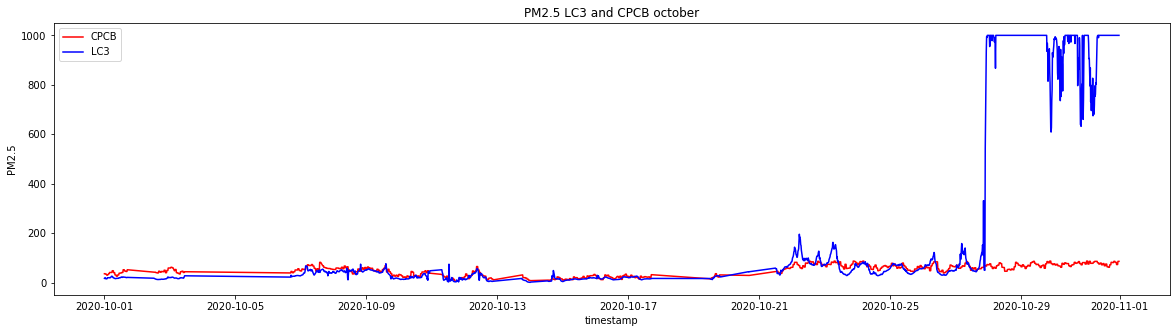

In [239]:
x = oct3['created_at']
y1 = oct3['PM2.5']
y2 = oct3['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB october')
plt.show()

In [240]:
# calculate summary statistics
lc3_mean, lc3_std = np.mean(oct3['PM2.5_3']), np.std(oct3['PM2.5_3'])

# identify outliers
cut_off = lc3_std * 3
lower, upper = lc3_mean - cut_off, lc3_mean + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
print("mean and standard deviation: ", lc3_mean, lc3_std)
#identifying outliers
outliers = [x for x in oct3['PM2.5_3'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in oct3['PM2.5_3']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
oct3_1  = oct3[oct3['PM2.5_3'] > lower]
oct3_2 = oct3_1[oct3['PM2.5_3'] < upper] 

cut off:  1089.4419399002636
lower and upper boundaries:  -874.22 1304.66
mean and standard deviation:  215.22119922630634 363.14731330008783
Identified outliers: 0
Non-outlier observations: 2068


In [241]:
# calculate interquartile range
q25, q75 = np.percentile(oct3['PM2.5_3'], 25), np.percentile(oct3['PM2.5_3'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
#identifying outliers
outliers = [x for x in oct3['PM2.5_3'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in oct3['PM2.5_3']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
print("q25,q75 ", q25, q75)
oct3_1 = oct3[oct3['PM2.5_3'] < upper]


cut off:  105.08250000000001
lower and upper boundaries:  -85.4 194.82
Identified outliers: 395
Non-outlier observations: 1673
q25,q75  19.677500000000002 89.7325


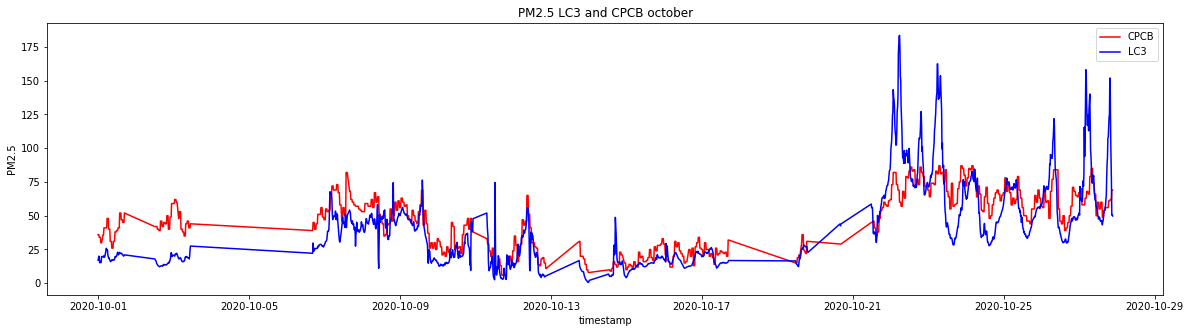

In [242]:
x = oct3_1['created_at']
y1 = oct3_1['PM2.5']
y2 = oct3_1['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB october')
plt.show()

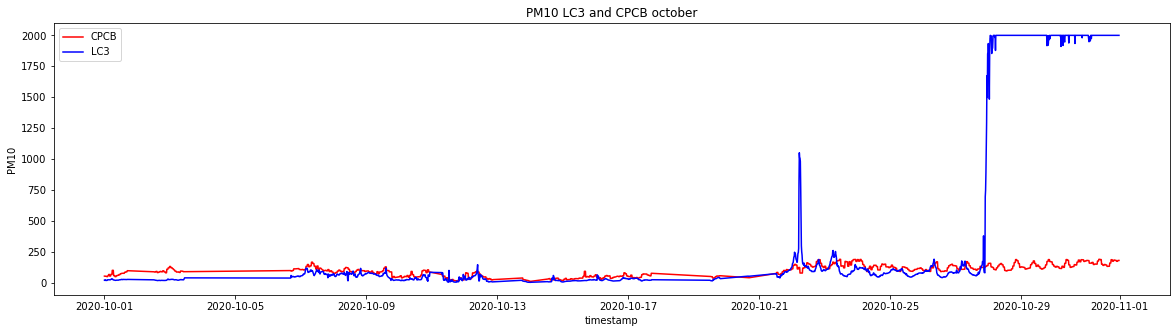

In [243]:
x = oct3['created_at']
y_1 = oct3['PM10']
y_2 = oct3['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_1, 'r') 
plt.plot(x, y_2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB october')
plt.show()

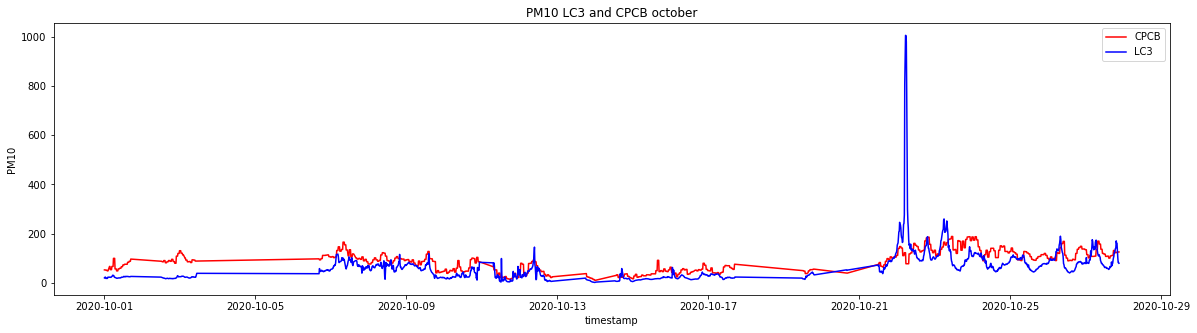

In [244]:
x = oct3_1['created_at']
y_1 = oct3_1['PM10']
y_2 = oct3_1['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_1, 'r') 
plt.plot(x, y_2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB october')
plt.show()

max correlation is at lag 4
max correlation is  0.784
Pearsons correlation: 0.774
MSE PM2.5:  399.71078296473405
MAE PM2.5:  14.462396891811117
RMSE PM2.5:  19.992768266669177


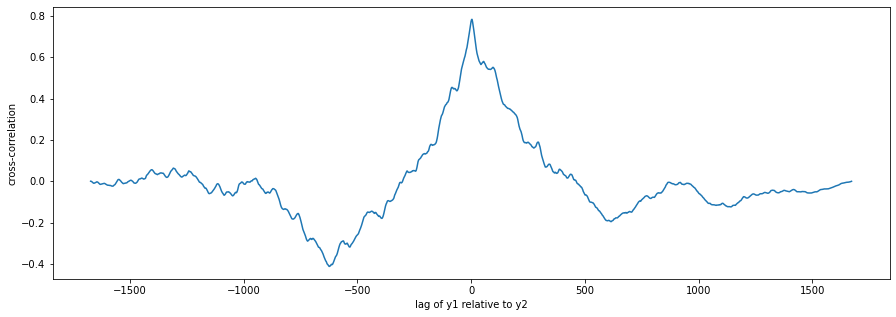

In [245]:
npts = len(oct3_1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y1, y2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct3_1['PM2.5_3'], oct3_1['PM2.5'])
MAE = mean_absolute_error(oct3_1['PM2.5_3'], oct3_1['PM2.5'])
print("MSE PM2.5: ", MSE)
print("MAE PM2.5: ", MAE)
print("RMSE PM2.5: ", np.sqrt(mean_squared_error(oct3_1['PM2.5_3'], oct3_1['PM2.5'])))

max correlation is at lag 55
max correlation is  0.516
Pearsons correlation: 0.499
MSE PM10:  4030.4021991034074
MAE PM10:  38.44361625821877
RMSE PM10:  63.48544871939874


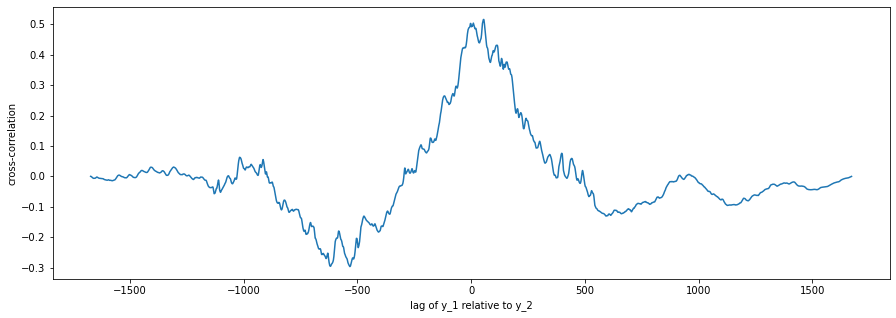

In [246]:
npts = len(oct3_1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_1 - y_1.mean(), y_2 - y_2.mean(), mode='full')
ccor = ccov / (npts * y_1.std() * y_2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_1 relative to y_2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_1, y_2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct3_1['PM10_3'], oct3_1['PM10'])
MAE = mean_absolute_error(oct3_1['PM10_3'], oct3_1['PM10'])
print("MSE PM10: ", MSE)
print("MAE PM10: ", MAE)
print("RMSE PM10: ", np.sqrt(mean_squared_error(oct3_1['PM10_3'], oct3_1['PM10'])))

Coefficients:  [[0.53658508]]
Intercept:  [24.02676399]
R2  0.6169281557149269
MAE of simple linear regression 10.607838681628685
MSE of simple linear regression 162.98583766031265
RMSE of simple linear regression 12.766590682727815
Test data Spearman correlation of simple linear regression: 0.871
Train data Spearman correlation of simple linear regression: 0.866
Mean Absolute Error Random Forest: 8.942218952922078
Mean Squared Error Random Forest: 132.8502312284597
Root Mean Squared Error Random Forest: 11.526067465899187
Test data R-2 score Random Forest: 0.688
Test data Spearman correlation Random Forest: 0.836


<ipython-input-248-a44b363e58c5>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


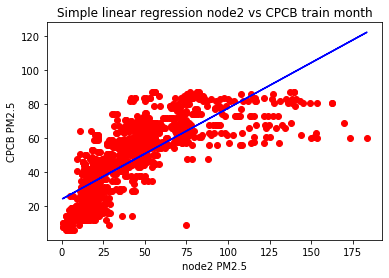

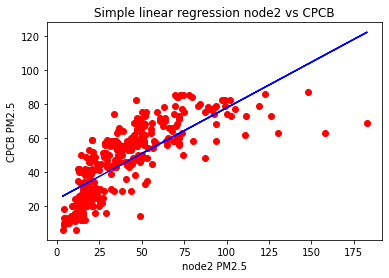

In [248]:
msk = (np.random.rand(len(oct3_1)) < 0.8)
train = oct3_1[msk]
test = oct3_1[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_3']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_3']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [249]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'PM10_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'PM10_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.65188603 -0.06478684]]
Intercept:  [23.2931893]
R2  0.6262514581845271
MAE  10.511302478988075
MSE  159.01904582886334
RMSE  12.610275406543005
variance score = 0.6269088285216717
Test data Spearman correlation: 0.866
Mean Absolute Error Random Forest: 7.158238636363635
Mean Squared Error Random Forest: 89.67474431818181
Root Mean Squared Error Random Forest: 9.469674984822964
Test data R-2 score Random Forest: 0.789
Test data Spearman correlation Random Forest: 0.887


<ipython-input-249-e3fe9c052b26>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [250]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'RH_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'RH_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.49053002 -0.60990618]]
Intercept:  [67.0911585]
R2  0.736697272243459
MAE  8.400748424224115
MSE  112.02759033814304
RMSE  10.584308684942208
variance score = 0.7371430934648905
Test data Spearman correlation: 0.892
Mean Absolute Error Random Forest: 5.5241477272727275
Mean Squared Error Random Forest: 62.45264204545455
Root Mean Squared Error Random Forest: 7.90269840278968
Test data R-2 score Random Forest: 0.853
Test data Spearman correlation Random Forest: 0.917


<ipython-input-250-a7316fa3bfe8>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [251]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'PM10_3', 'RH_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'PM10_3', 'RH_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.567254   -0.04247934 -0.59502586]]
Intercept:  [65.55949638]
R2  0.7408804270724787
MAE  8.347279876293031
MSE  110.24778061304305
RMSE  10.499894314374933
variance score = 0.7413605114014665
Test data Spearman correlation: 0.891
Mean Absolute Error Random Forest: 4.705681818181818
Mean Squared Error Random Forest: 42.05823863636363
Root Mean Squared Error Random Forest: 6.48523235022182
Test data R-2 score Random Forest: 0.901
Test data Spearman correlation Random Forest: 0.946


<ipython-input-251-8f9da41a1d60>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


## Removing values RH > 75

In [252]:
oct3_rh = oct3_1[oct3_1['RH_3'] < 75]

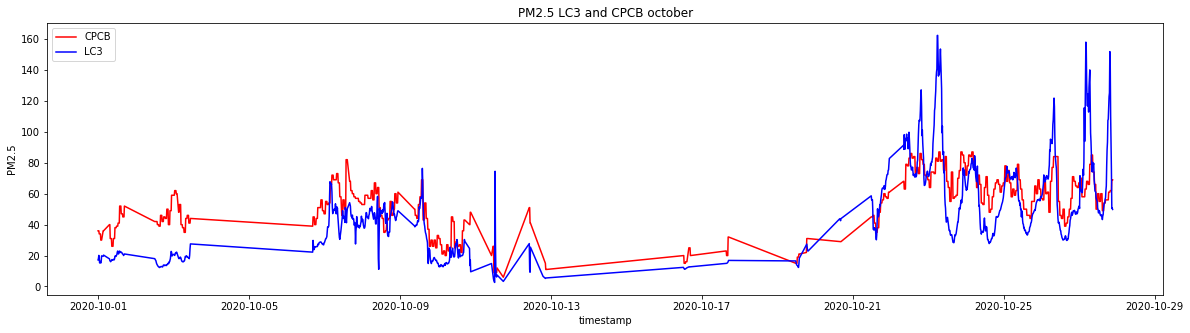

In [253]:
x = oct3_rh['created_at']
y11 = oct3_rh['PM2.5']
y22 = oct3_rh['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y11, 'r') 
plt.plot(x, y22, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB october')
plt.show()

max correlation is at lag 4
max correlation is  0.754
Pearsons correlation: 0.730
MSE:  444.9445148082069
MAE:  16.591605709188222
RMSE  21.093707943560016


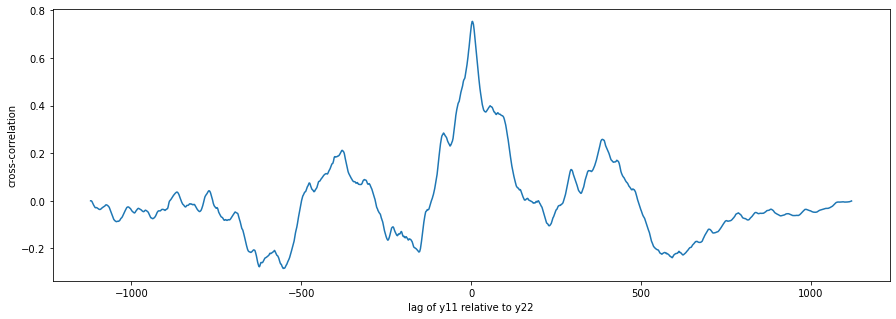

In [254]:
npts = len(oct3_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y11 - y11.mean(), y22 - y22.mean(), mode='full')
ccor = ccov / (npts * y11.std() * y22.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y11 relative to y22')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y11, y22) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct3_rh['PM2.5_3'], oct3_rh['PM2.5'])
MAE = mean_absolute_error(oct3_rh['PM2.5_3'], oct3_rh['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(oct3_rh['PM2.5_3'], oct3_rh['PM2.5'])))

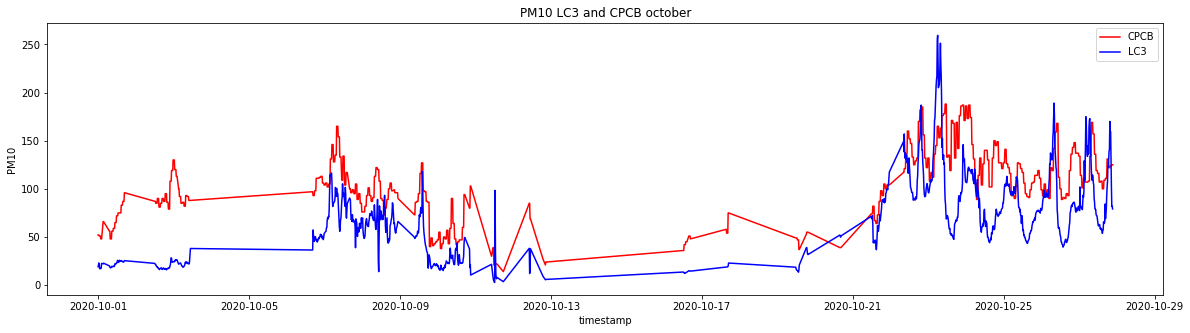

In [255]:
x = oct3_rh['created_at']
y1_1 = oct3_rh['PM10']
y2_2 = oct3_rh['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1_1, 'r') 
plt.plot(x, y2_2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB october')
plt.show()

max correlation is at lag 4
max correlation is  0.717
Pearsons correlation: 0.689
MSE:  2290.8420966101694
MAE:  41.69403211418376
RMSE  47.86274225961326


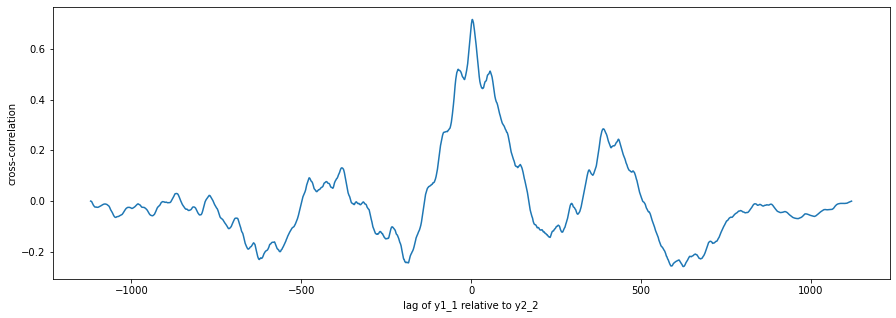

In [256]:
npts = len(oct3_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1_1 - y1_1.mean(), y2_2 - y2_2.mean(), mode='full')
ccor = ccov / (npts * y1_1.std() * y2_2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1_1 relative to y2_2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y1_1, y2_2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct3_rh['PM10_3'], oct3_rh['PM10'])
MAE = mean_absolute_error(oct3_rh['PM10_3'], oct3_rh['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(oct3_rh['PM10_3'], oct3_rh['PM10'])))

Coefficients:  [[0.44618051]]
Intercept:  [33.49061733]
R2  0.5287469107726623
MAE of simple linear regression 9.07828083773076
MSE of simple linear regression 138.00471166059484
RMSE of simple linear regression 11.747540664351618
Test data Spearman correlation of simple linear regression: 0.752
Train data Spearman correlation of simple linear regression: 0.813
Mean Absolute Error Random Forest: 9.614657320872276
Mean Squared Error Random Forest: 160.75586612149533
Root Mean Squared Error Random Forest: 12.678953668244684
Test data R-2 score Random Forest: 0.451
Test data Spearman correlation Random Forest: 0.696


<ipython-input-257-74b7e037dc1c>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


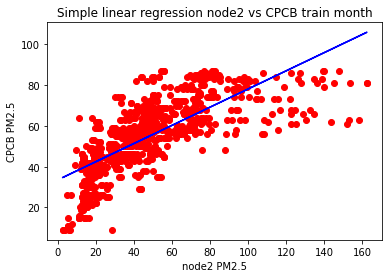

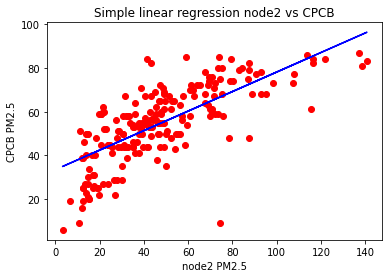

In [257]:
msk = (np.random.rand(len(oct3_rh)) < 0.8)
train = oct3_rh[msk]
test = oct3_rh[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_3']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_3']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [258]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'PM10_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'PM10_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[-0.28343928  0.52448929]]
Intercept:  [32.18228668]
R2  0.5824063215596862
MAE  8.403535977107651
MSE  122.29075310451998
RMSE  11.058514959275499
variance score = 0.5824957325834925
Test data Spearman correlation: 0.803
Mean Absolute Error Random Forest: 7.516355140186916
Mean Squared Error Random Forest: 118.19976635514018
Root Mean Squared Error Random Forest: 10.871971594662128
Test data R-2 score Random Forest: 0.596
Test data Spearman correlation Random Forest: 0.783


<ipython-input-258-e3fe9c052b26>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [259]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'RH_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'RH_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.45040925 -0.352422  ]]
Intercept:  [55.1291818]
R2  0.5459792195933612
MAE  9.113309574543855
MSE  132.95829421652874
RMSE  11.53075427786616
variance score = 0.5461996526222358
Test data Spearman correlation: 0.73
Mean Absolute Error Random Forest: 7.104205607476636
Mean Squared Error Random Forest: 103.90892523364487
Root Mean Squared Error Random Forest: 10.193572741372128
Test data R-2 score Random Forest: 0.645
Test data Spearman correlation Random Forest: 0.782


<ipython-input-259-a7316fa3bfe8>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [260]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'PM10_3', 'RH_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'PM10_3', 'RH_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[-0.26872729  0.51686511 -0.34218982]]
Intercept:  [53.21161828]
R2  0.5984437692708702
MAE  8.469685092383349
MSE  117.59424628525935
RMSE  10.844088079929051
variance score = 0.5985666247987125
Test data Spearman correlation: 0.778
Mean Absolute Error Random Forest: 5.316822429906542
Mean Squared Error Random Forest: 58.95981308411215
Root Mean Squared Error Random Forest: 7.678529356856829
Test data R-2 score Random Forest: 0.799
Test data Spearman correlation Random Forest: 0.888


<ipython-input-260-8f9da41a1d60>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


## November

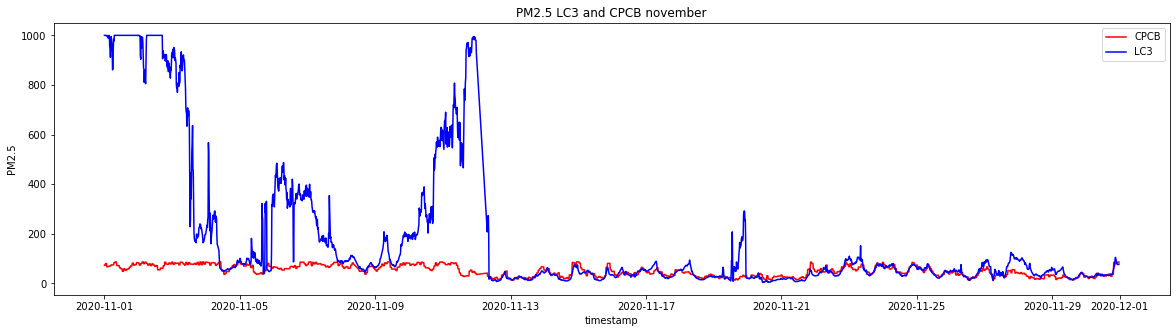

In [261]:
x = nov3['created_at']
y3 = nov3['PM2.5']
y4 = nov3['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3, 'r') 
plt.plot(x, y4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB november')
plt.show()

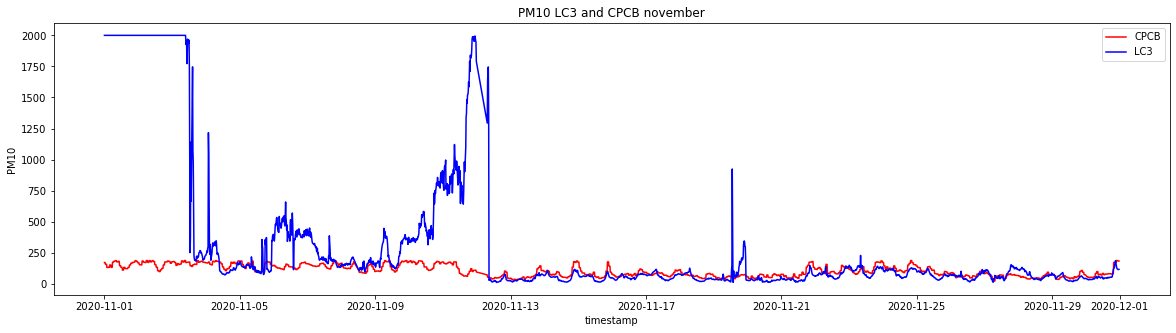

In [262]:
x = nov3['created_at']
y_3 = nov3['PM10']
y_4 = nov3['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_3, 'r') 
plt.plot(x, y_4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB november')
plt.show()

In [263]:
# calculate interquartile range
q25, q75 = np.percentile(nov3['PM2.5_3'], 25), np.percentile(nov3['PM2.5_3'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
#identifying outliers
outliers = [x for x in nov3['PM2.5_3'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in nov3['PM2.5_3']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
print("q25,q75 ", q25, q75)
nov3_1 = nov3[nov3['PM2.5_3'] < upper]


cut off:  212.85000000000002
lower and upper boundaries:  -181.26 386.34
Identified outliers: 407
Non-outlier observations: 2410
q25,q75  31.59 173.49


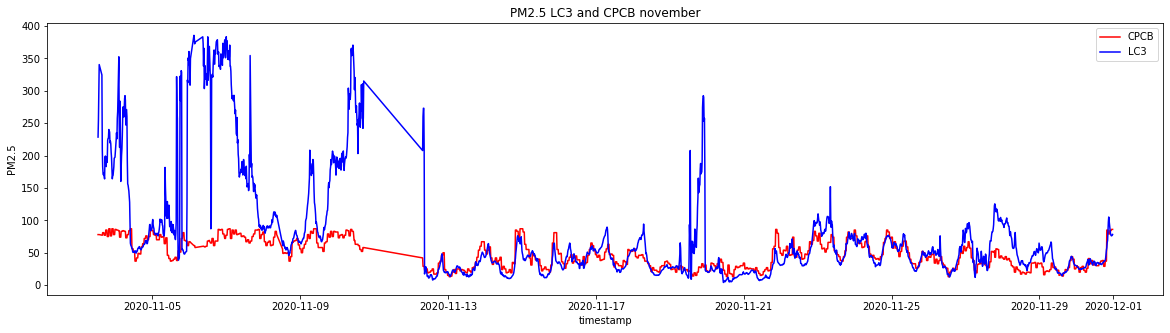

In [264]:
x = nov3_1['created_at']
y3 = nov3_1['PM2.5']
y4 = nov3_1['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3, 'r') 
plt.plot(x, y4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB november')
plt.show()

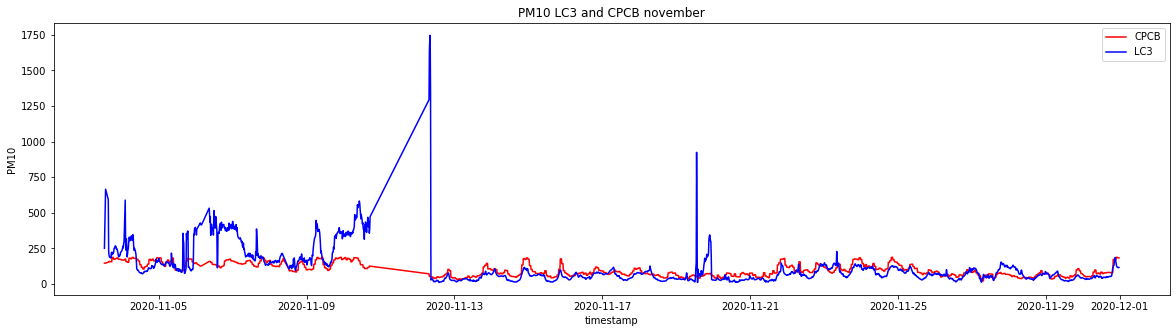

In [265]:
x = nov3_1['created_at']
y_3 = nov3_1['PM10']
y_4 = nov3_1['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_3, 'r') 
plt.plot(x, y_4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB november')
plt.show()

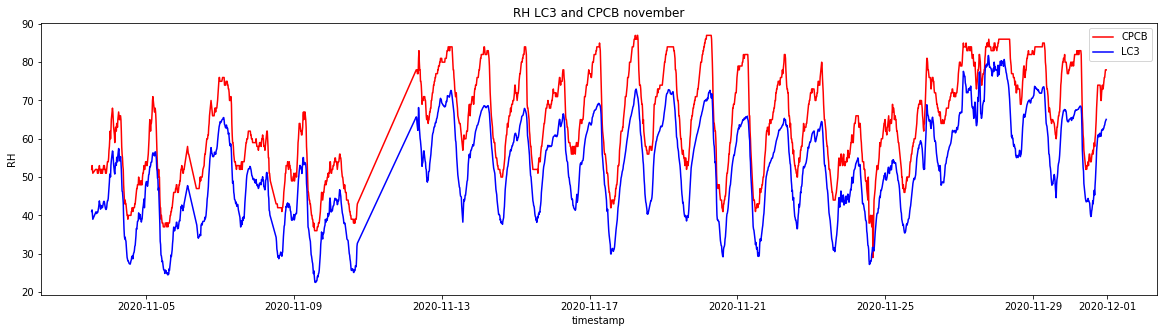

In [266]:
x = nov3_1['created_at']
y3_r = nov3_1['RH']
y4_r = nov3_1['RH_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_r, 'r') 
plt.plot(x, y4_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('RH')
plt.legend(["CPCB", 'LC3'])
plt.title('RH LC3 and CPCB november')
plt.show()

max correlation is at lag 3
max correlation is  0.606
Pearsons correlation: 0.605
MSE:  5717.227678091286
MAE:  37.41339419087137
RMSE  75.61235135935985


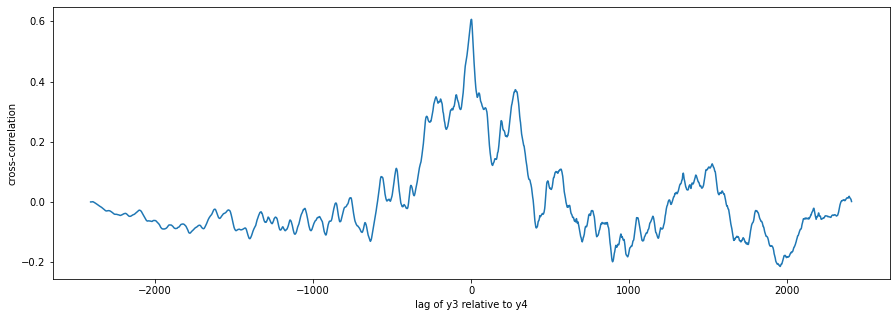

In [267]:
npts = len(nov3_1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y3 - y3.mean(), y4 - y4.mean(), mode='full')
ccor = ccov / (npts * y3.std() * y4.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y3 relative to y4')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y3, y4) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov3_1['PM2.5_3'], nov3_1['PM2.5'])
MAE = mean_absolute_error(nov3_1['PM2.5_3'], nov3_1['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov3_1['PM2.5_3'], nov3_1['PM2.5'])))

max correlation is at lag -4
max correlation is  0.546
Pearsons correlation: 0.538
MSE:  12037.131990041493
MAE:  54.804887966804976
RMSE  109.71386416511585


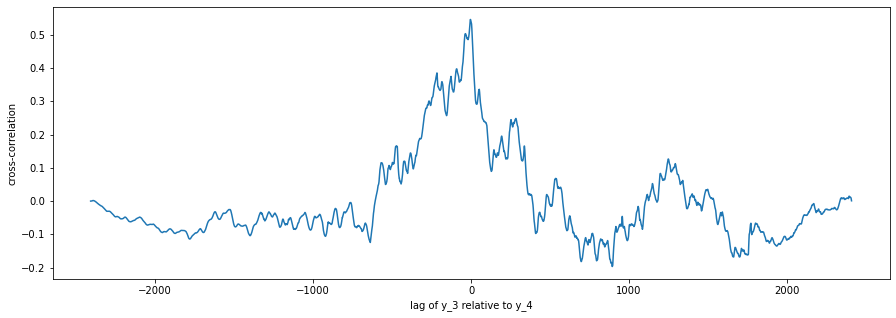

In [268]:
npts = len(nov3_1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_3 - y_3.mean(), y_4 - y_4.mean(), mode='full')
ccor = ccov / (npts * y_3.std() * y_4.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_3 relative to y_4')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_3, y_4) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov3_1['PM10_3'], nov3_1['PM10'])
MAE = mean_absolute_error(nov3_1['PM10_3'], nov3_1['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov3_1['PM10_3'], nov3_1['PM10'])))

Coefficients:  [[0.16224913]]
Intercept:  [34.6443112]
R2  0.30161678025059735
MAE of simple linear regression 14.07397491920638
MSE of simple linear regression 299.5517492562633
RMSE of simple linear regression 17.307563354102253
Test data Spearman correlation of simple linear regression: 0.798
Train data Spearman correlation of simple linear regression: 0.786
Mean Absolute Error Random Forest: 11.4196361863711
Mean Squared Error Random Forest: 232.26334580730997
Root Mean Squared Error Random Forest: 15.240188509572642
Test data R-2 score Random Forest: 0.458
Test data Spearman correlation Random Forest: 0.722


<ipython-input-269-1a5e1f8912e7>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


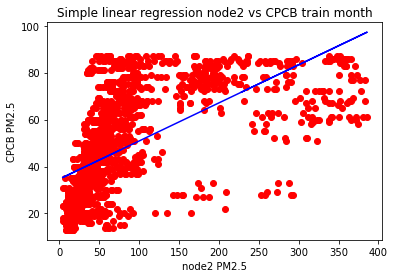

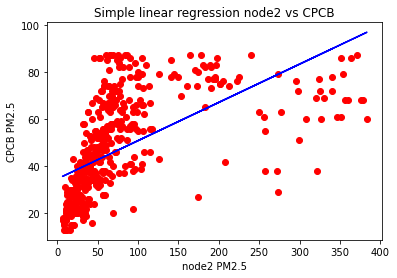

In [269]:
msk = (np.random.rand(len(nov3_1)) < 0.8)
train = nov3_1[msk]
test = nov3_1[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_3']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_3']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [270]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'PM10_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'PM10_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.12889046 0.02541966]]
Intercept:  [34.35335706]
R2  0.2935853997928123
MAE  13.941672677305753
MSE  302.99658297654565
RMSE  17.406797033818304
variance score = 0.2965562820957196
Test data Spearman correlation: 0.813
Mean Absolute Error Random Forest: 7.70948275862069
Mean Squared Error Random Forest: 108.83590517241379
Root Mean Squared Error Random Forest: 10.432444831985157
Test data R-2 score Random Forest: 0.746
Test data Spearman correlation Random Forest: 0.877


<ipython-input-270-e3fe9c052b26>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [271]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'RH_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'RH_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.15796276 -0.17163641]]
Intercept:  [44.02168396]
R2  0.31439953986174385
MAE  13.861225150602031
MSE  294.06894569861885
RMSE  17.148438579025754
variance score = 0.31706881037999324
Test data Spearman correlation: 0.803
Mean Absolute Error Random Forest: 7.28125
Mean Squared Error Random Forest: 108.82859913793104
Root Mean Squared Error Random Forest: 10.432094666840934
Test data R-2 score Random Forest: 0.746
Test data Spearman correlation Random Forest: 0.867


<ipython-input-271-a7316fa3bfe8>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [272]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'PM10_3', 'RH_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'PM10_3', 'RH_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.12992338  0.02159096 -0.15983088]]
Intercept:  [43.12955664]
R2  0.3081868680493295
MAE  13.758685920418568
MSE  296.7336957331795
RMSE  17.225959936478997
variance score = 0.3103460141783596
Test data Spearman correlation: 0.813
Mean Absolute Error Random Forest: 5.901939655172414
Mean Squared Error Random Forest: 69.96015086206897
Root Mean Squared Error Random Forest: 8.364218484835805
Test data R-2 score Random Forest: 0.837
Test data Spearman correlation Random Forest: 0.921


<ipython-input-272-8f9da41a1d60>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


## Removing values RH > 75 in November

In [273]:
nov3_rh = nov3_1[nov3_1['RH_3'] < 75]

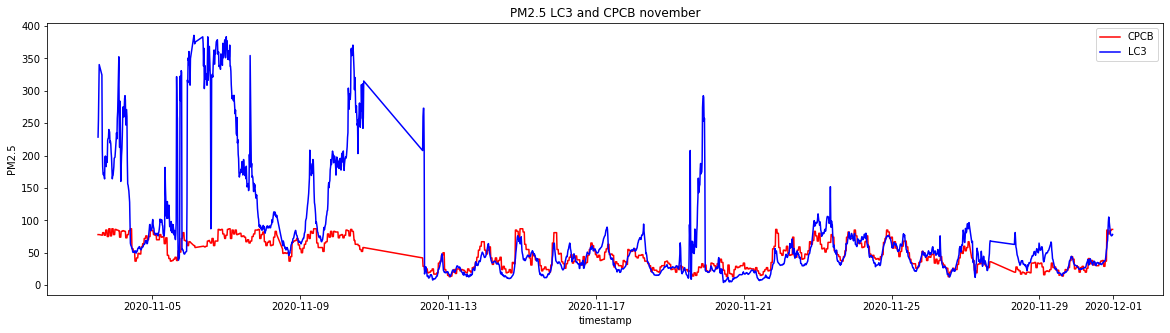

In [274]:
x = nov3_rh['created_at']
y33 = nov3_rh['PM2.5']
y44 = nov3_rh['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y33, 'r') 
plt.plot(x, y44, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB november')
plt.show()

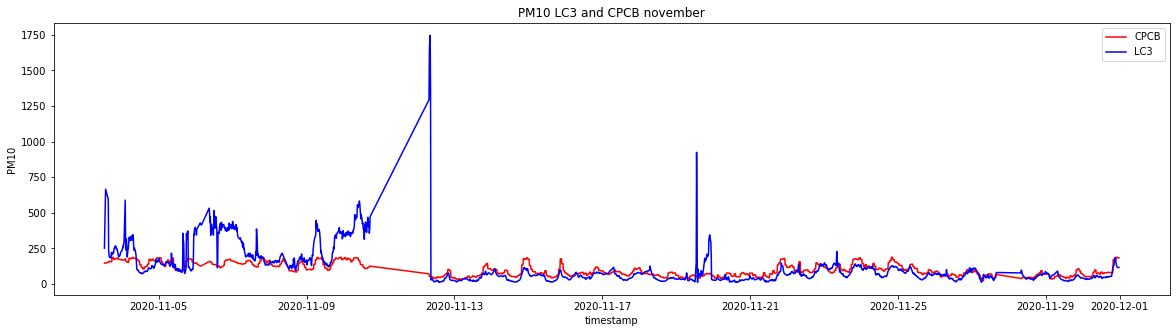

In [275]:
x = nov3_rh['created_at']
y3_3 = nov3_rh['PM10']
y4_4 = nov3_rh['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_3, 'r') 
plt.plot(x, y4_4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB november')
plt.show()

max correlation is at lag 3
max correlation is  0.608
Pearsons correlation: 0.607
MSE:  5809.301716332623
MAE:  37.16655863539445
RMSE  76.21877535314133


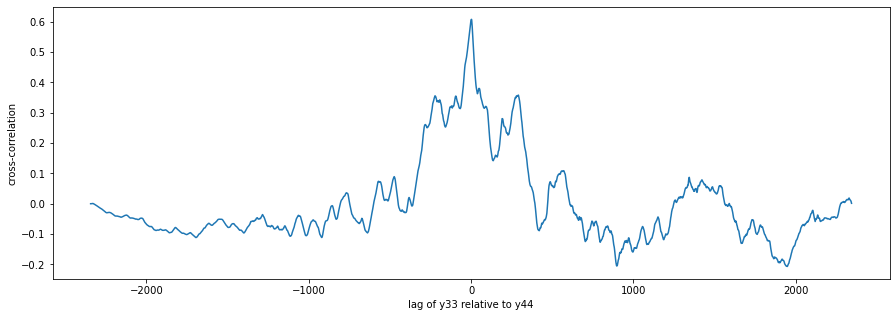

In [276]:
npts = len(nov3_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y33 - y33.mean(), y44 - y44.mean(), mode='full')
ccor = ccov / (npts * y33.std() * y44.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y33 relative to y44')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y33, y44) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov3_rh['PM2.5_3'], nov3_rh['PM2.5'])
MAE = mean_absolute_error(nov3_rh['PM2.5_3'], nov3_rh['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov3_rh['PM2.5_3'], nov3_rh['PM2.5'])))

max correlation is at lag -4
max correlation is  0.55
Pearsons correlation: 0.543
MSE:  12295.170722004264
MAE:  54.97665245202558
RMSE  110.88359085998371


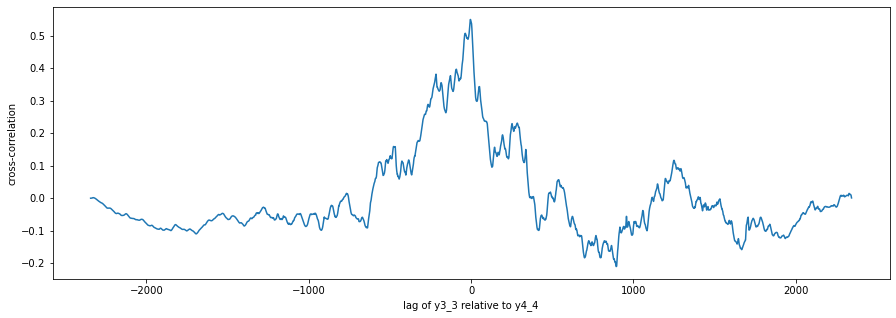

In [277]:
npts = len(nov3_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y3_3 - y3_3.mean(), y4_4 - y4_4.mean(), mode='full')
ccor = ccov / (npts * y3_3.std() * y4_4.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y3_3 relative to y4_4')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y3_3, y4_4) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov3_rh['PM10_3'], nov3_rh['PM10'])
MAE = mean_absolute_error(nov3_rh['PM10_3'], nov3_rh['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov3_rh['PM10_3'], nov3_rh['PM10'])))

Coefficients:  [[0.15538397]]
Intercept:  [35.31787968]
R2  0.41211969993702824
MAE of simple linear regression 13.619314864892024
MSE of simple linear regression 269.59526708262797
RMSE of simple linear regression 16.41935647589844
Test data Spearman correlation of simple linear regression: 0.821
Train data Spearman correlation of simple linear regression: 0.796
Mean Absolute Error Random Forest: 11.503546183546185
Mean Squared Error Random Forest: 259.883394762659
Root Mean Squared Error Random Forest: 16.120899316187636
Test data R-2 score Random Forest: 0.433
Test data Spearman correlation Random Forest: 0.694


<ipython-input-278-59c13efdf6ae>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


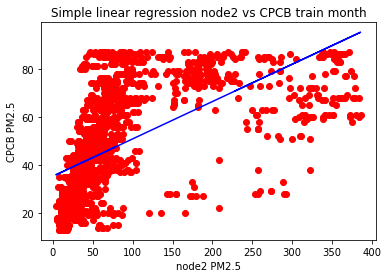

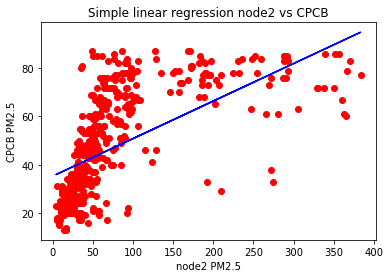

In [278]:
msk = (np.random.rand(len(nov3_rh)) < 0.8)
train = nov3_rh[msk]
test = nov3_rh[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_3']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_3']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [279]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'PM10_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'PM10_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.13556388 0.01486497]]
Intercept:  [35.15264522]
R2  0.4179700793262876
MAE  13.491043379157354
MSE  266.9123491590079
RMSE  16.337452346036326
variance score = 0.4215545792552058
Test data Spearman correlation: 0.828
Mean Absolute Error Random Forest: 8.175675675675675
Mean Squared Error Random Forest: 132.76970893970895
Root Mean Squared Error Random Forest: 11.522573885192012
Test data R-2 score Random Forest:  0.71
Test data Spearman correlation Random Forest: 0.844


<ipython-input-279-e3fe9c052b26>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [280]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'RH_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'RH_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.15132879 -0.14714854]]
Intercept:  [43.24419357]
R2  0.42756429474305213
MAE  13.404131236248675
MSE  262.5125503097288
RMSE  16.2022390523572
variance score = 0.4313355351665955
Test data Spearman correlation: 0.821
Mean Absolute Error Random Forest: 7.697089397089396
Mean Squared Error Random Forest: 131.62471933471934
Root Mean Squared Error Random Forest: 11.472781673801665
Test data R-2 score Random Forest: 0.713
Test data Spearman correlation Random Forest: 0.846


<ipython-input-280-a7316fa3bfe8>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [281]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'PM10_3', 'RH_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'PM10_3', 'RH_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.13387999  0.01319025 -0.14212966]]
Intercept:  [42.82722727]
R2  0.4317658827499544
MAE  13.30967188346553
MSE  260.58574949539525
RMSE  16.14266859894594
variance score = 0.4354105451829119
Test data Spearman correlation: 0.825
Mean Absolute Error Random Forest: 6.159251559251559
Mean Squared Error Random Forest: 86.19550935550934
Root Mean Squared Error Random Forest: 9.284153669317917
Test data R-2 score Random Forest: 0.812
Test data Spearman correlation Random Forest: 0.897


<ipython-input-281-8f9da41a1d60>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


## December

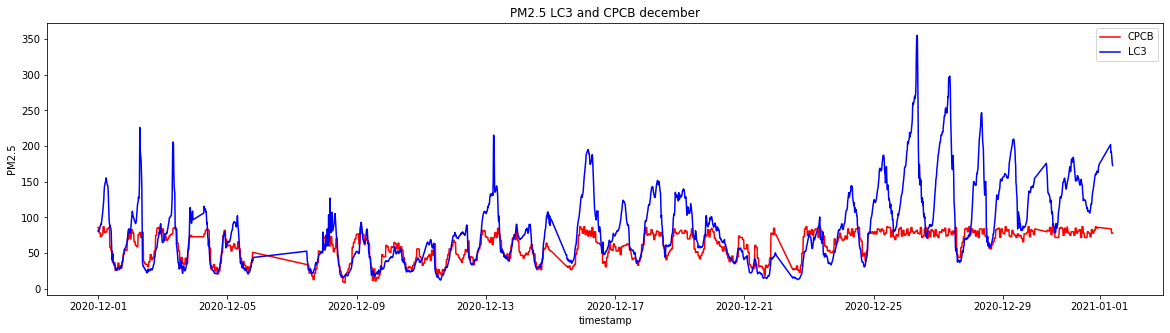

In [282]:
x = dec3['created_at']
y5 = dec3['PM2.5']
y6 = dec3['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5, 'r') 
plt.plot(x, y6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB december')
plt.show()

max correlation is at lag 1
max correlation is  0.721
Pearsons correlation: 0.720
MSE:  2268.1585128224583
MAE:  30.533634294385433
RMSE  47.62518779829071


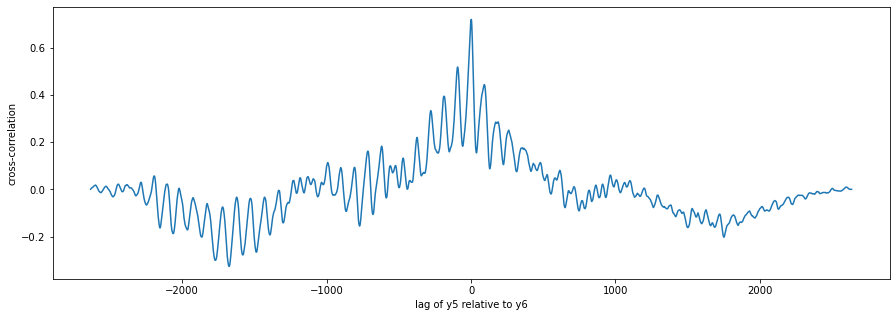

In [283]:
npts = len(dec3)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y5 - y5.mean(), y6 - y6.mean(), mode='full')
ccor = ccov / (npts * y5.std() * y6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y5 relative to y6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y5, y6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec3['PM2.5_3'], dec3['PM2.5'])
MAE = mean_absolute_error(dec3['PM2.5_3'], dec3['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec3['PM2.5_3'], dec3['PM2.5'])))

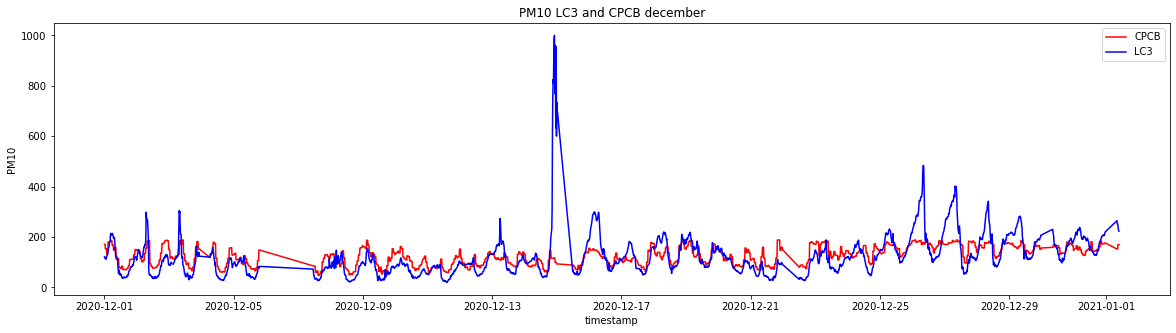

In [284]:
x = dec3['created_at']
y_5 = dec3['PM10']
y_6 = dec3['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_5, 'r') 
plt.plot(x, y_6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB december')
plt.show()

max correlation is at lag 2
max correlation is  0.545
Pearsons correlation: 0.541
MSE:  5473.750373823976
MAE:  42.054597875569044
RMSE  73.98479826169681


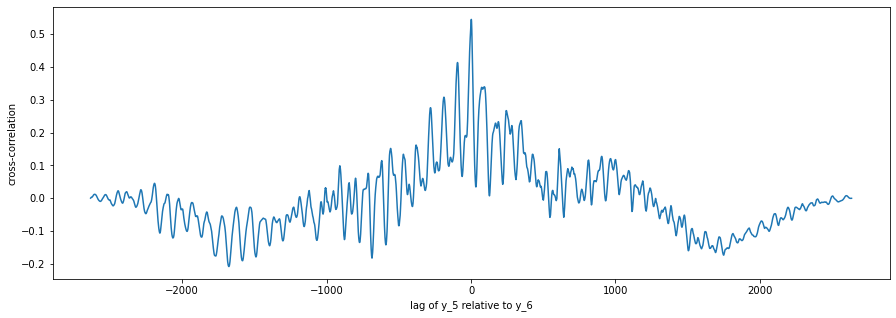

In [285]:
npts = len(dec3)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_5 - y_5.mean(), y_6 - y_6.mean(), mode='full')
ccor = ccov / (npts * y_5.std() * y_6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_5 relative to y_6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_5, y_6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec3['PM10_3'], dec3['PM10'])
MAE = mean_absolute_error(dec3['PM10_3'], dec3['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec3['PM10_3'], dec3['PM10'])))

In [286]:
# calculate interquartile range
q25, q75 = np.percentile(dec3['PM2.5_3'], 25), np.percentile(dec3['PM2.5_3'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
#identifying outliers
outliers = [x for x in dec3['PM2.5_3'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in dec3['PM2.5_3']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
print("q25,q75 ", q25, q75)
dec3_1 = dec3[dec3['PM2.5_3'] < upper]


cut off:  105.8925
lower and upper boundaries:  -62.89 219.49
Identified outliers: 56
Non-outlier observations: 2580
q25,q75  43.0025 113.5975


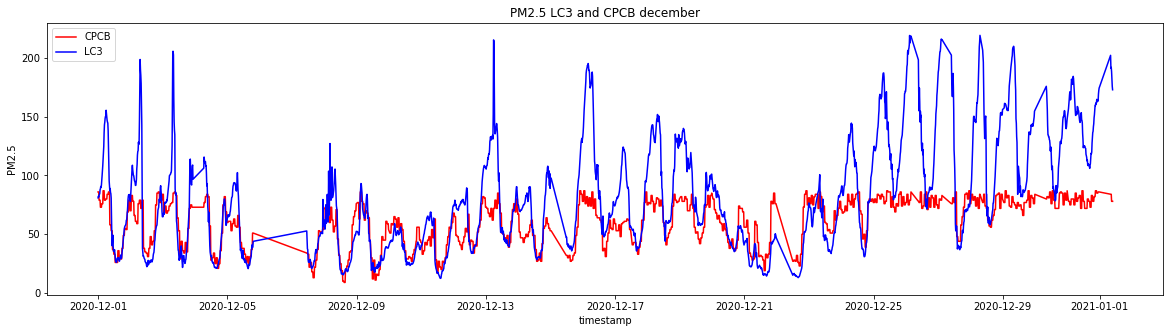

In [287]:
x = dec3_1['created_at']
y5 = dec3_1['PM2.5']
y6 = dec3_1['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5, 'r') 
plt.plot(x, y6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB december')
plt.show()

max correlation is at lag 1
max correlation is  0.755
Pearsons correlation: 0.753
MSE:  1600.2027329457367
MAE:  27.319224806201554
RMSE  40.00253408155209


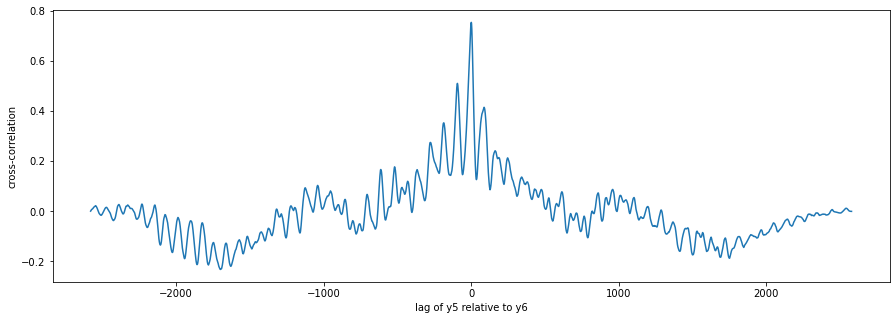

In [288]:
npts = len(dec3_1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y5 - y5.mean(), y6 - y6.mean(), mode='full')
ccor = ccov / (npts * y5.std() * y6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y5 relative to y6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y5, y6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec3_1['PM2.5_3'], dec3_1['PM2.5'])
MAE = mean_absolute_error(dec3_1['PM2.5_3'], dec3_1['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec3_1['PM2.5_3'], dec3_1['PM2.5'])))

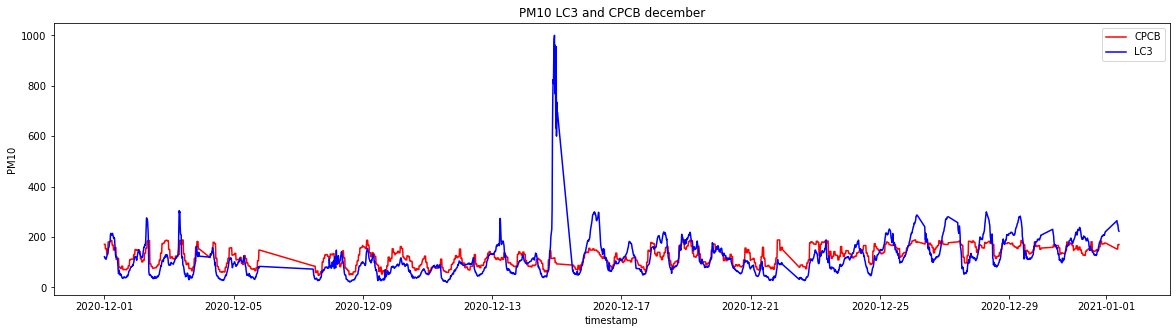

In [289]:
x = dec3_1['created_at']
y_5 = dec3_1['PM10']
y_6 = dec3_1['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_5, 'r') 
plt.plot(x, y_6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB december')
plt.show()

max correlation is at lag 2
max correlation is  0.515
Pearsons correlation: 0.511
MSE:  4926.499440891472
MAE:  39.31158527131783
RMSE  70.18902649910078


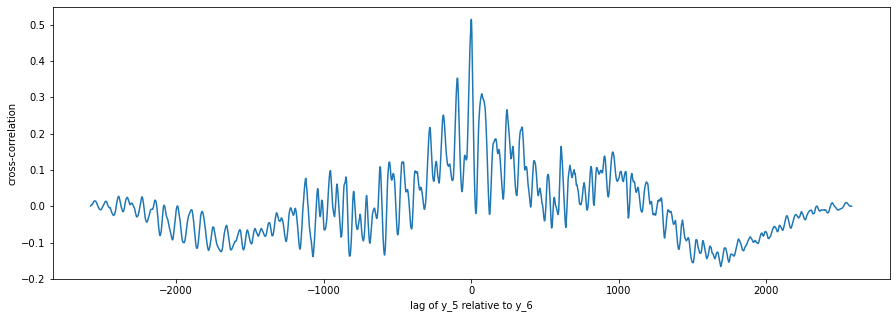

In [290]:
npts = len(dec3_1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_5 - y_5.mean(), y_6 - y_6.mean(), mode='full')
ccor = ccov / (npts * y_5.std() * y_6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_5 relative to y_6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_5, y_6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec3_1['PM10_3'], dec3_1['PM10'])
MAE = mean_absolute_error(dec3_1['PM10_3'], dec3_1['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec3_1['PM10_3'], dec3_1['PM10'])))

Coefficients:  [[0.31871729]]
Intercept:  [35.11285232]
R2  0.5593058814436727
MAE of simple linear regression 11.02465505557301
MSE of simple linear regression 175.54236857038444
RMSE of simple linear regression 13.249240301631804
Test data Spearman correlation of simple linear regression: 0.825
Train data Spearman correlation of simple linear regression: 0.806
Mean Absolute Error Random Forest: 9.180424610850144
Mean Squared Error Random Forest: 156.0149241538266
Root Mean Squared Error Random Forest: 12.490593426808296
Test data R-2 score Random Forest: 0.608
Test data Spearman correlation Random Forest: 0.756


<ipython-input-291-913cc08e5880>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


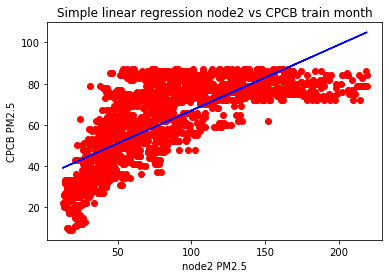

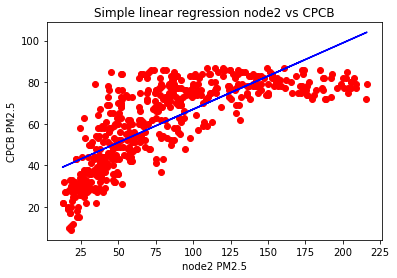

In [291]:
msk = (np.random.rand(len(dec3_1)) < 0.8)
train = dec3_1[msk]
test = dec3_1[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_3']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_3']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [292]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'PM10_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'PM10_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.31362407 0.00398099]]
Intercept:  [35.05429669]
R2  0.5591140386518455
MAE  11.034916650985044
MSE  175.61878560581215
RMSE  13.252123814914052
variance score = 0.5615473068053096
Test data Spearman correlation: 0.825
Mean Absolute Error Random Forest: 7.197098646034815
Mean Squared Error Random Forest: 95.12168278529981
Root Mean Squared Error Random Forest: 9.753034542402677
Test data R-2 score Random Forest: 0.761
Test data Spearman correlation Random Forest: 0.839


<ipython-input-292-e3fe9c052b26>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [293]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'RH_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'RH_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.29808719 0.10568422]]
Intercept:  [31.52183267]
R2  0.5647417344791741
MAE  10.936035913612326
MSE  173.37709683910205
RMSE  13.167273705634818
variance score = 0.5669587635917801
Test data Spearman correlation: 0.816
Mean Absolute Error Random Forest: 7.268665377176015
Mean Squared Error Random Forest: 101.72767891682787
Root Mean Squared Error Random Forest: 10.08601402521471
Test data R-2 score Random Forest: 0.745
Test data Spearman correlation Random Forest: 0.838


<ipython-input-293-a7316fa3bfe8>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [294]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'PM10_3', 'RH_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'PM10_3', 'RH_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.29391856 0.00337485 0.1049204 ]]
Intercept:  [31.49814647]
R2  0.564537741335545
MAE  10.944668103920632
MSE  173.45835374292025
RMSE  13.170358907141456
variance score = 0.5667590115171706
Test data Spearman correlation: 0.816
Mean Absolute Error Random Forest: 6.16266924564797
Mean Squared Error Random Forest: 73.87765957446808
Root Mean Squared Error Random Forest: 8.59521143279606
Test data R-2 score Random Forest: 0.815
Test data Spearman correlation Random Forest: 0.88


<ipython-input-294-8f9da41a1d60>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


## Removing values RH > 75

In [295]:
dec3_rh = dec3[dec3['RH_3'] < 75]

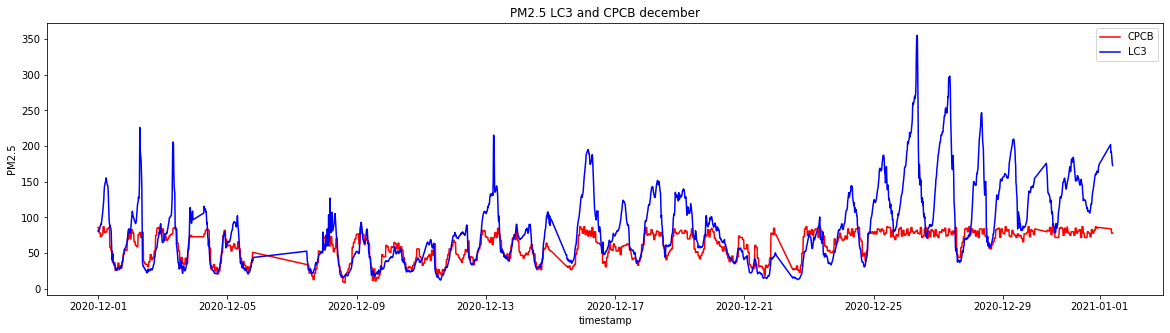

In [296]:
x = dec3_rh['created_at']
y55 = dec3_rh['PM2.5']
y66 = dec3_rh['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y55, 'r') 
plt.plot(x, y66, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB december')
plt.show()

max correlation is at lag 1
max correlation is  0.721
Pearsons correlation: 0.720
MSE:  2268.1585128224583
MAE:  30.533634294385433
RMSE  47.62518779829071


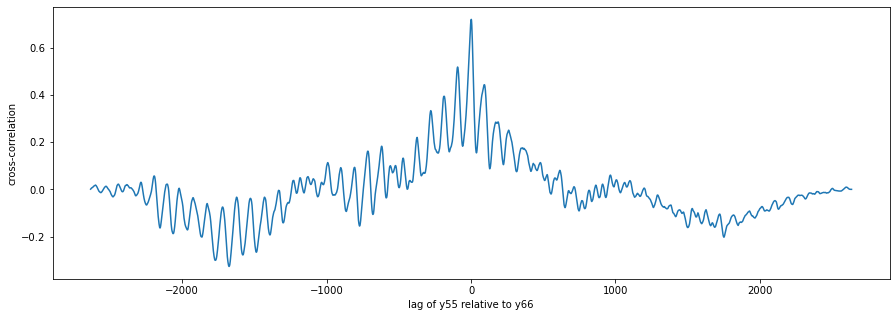

In [297]:
npts = len(dec3_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y55 - y55.mean(), y66 - y66.mean(), mode='full')
ccor = ccov / (npts * y55.std() * y66.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y55 relative to y66')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y55, y66) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec3_rh['PM2.5_3'], dec3_rh['PM2.5'])
MAE = mean_absolute_error(dec3_rh['PM2.5_3'], dec3_rh['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec3_rh['PM2.5_3'], dec3_rh['PM2.5'])))

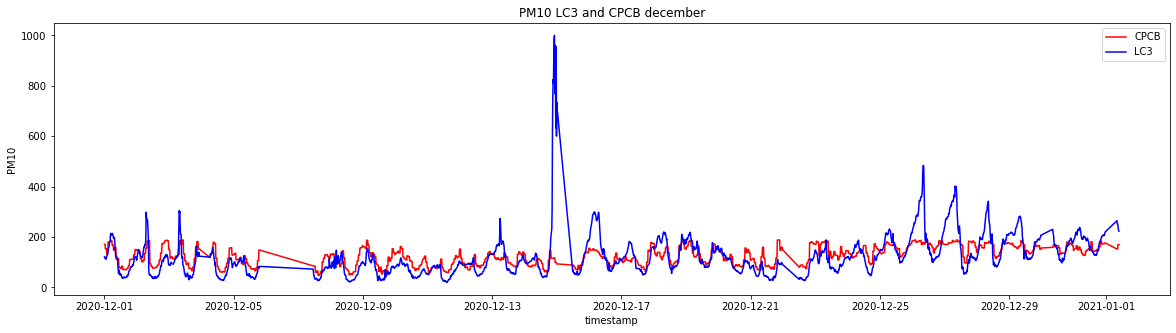

In [298]:
x = dec3_rh['created_at']
y5_5 = dec3_rh['PM10']
y6_6 = dec3_rh['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5_5, 'r') 
plt.plot(x, y6_6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB december')
plt.show()

max correlation is at lag 2
max correlation is  0.545
Pearsons correlation: 0.541
MSE:  5473.750373823976
MAE:  42.054597875569044
RMSE  73.98479826169681


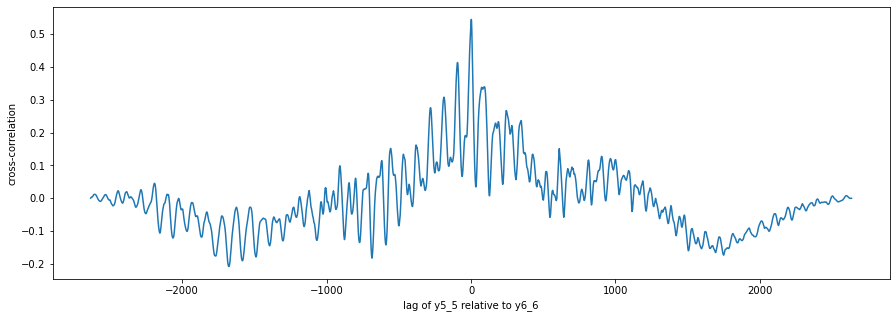

In [299]:
npts = len(dec3_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y5_5 - y5_5.mean(), y6_6 - y6_6.mean(), mode='full')
ccor = ccov / (npts * y5_5.std() * y6_6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y5_5 relative to y6_6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y5_5, y6_6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec3_rh['PM10_3'], dec3_rh['PM10'])
MAE = mean_absolute_error(dec3_rh['PM10_3'], dec3_rh['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec3_rh['PM10_3'], dec3_rh['PM10'])))

Coefficients:  [[0.2630511]]
Intercept:  [38.91264876]
R2  0.548829868023984
MAE of simple linear regression 11.036374343139512
MSE of simple linear regression 179.9047640389726
RMSE of simple linear regression 13.412858160696869
Test data Spearman correlation of simple linear regression: 0.828
Train data Spearman correlation of simple linear regression: 0.807
Mean Absolute Error Random Forest: 8.360624942433454
Mean Squared Error Random Forest: 124.15564941830375
Root Mean Squared Error Random Forest: 11.142515399060652
Test data R-2 score Random Forest: 0.689
Test data Spearman correlation Random Forest: 0.79


<ipython-input-300-c9ebef1cf494>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


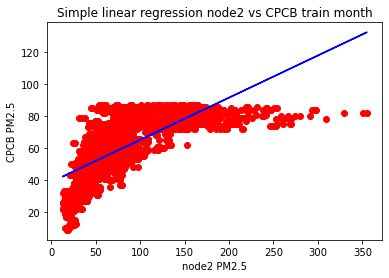

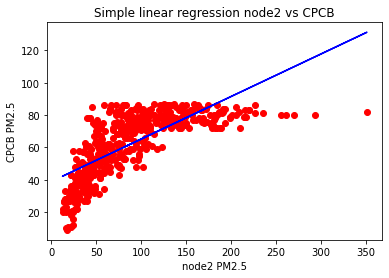

In [300]:
msk = (np.random.rand(len(dec3_rh)) < 0.8)
train = dec3_rh[msk]
test = dec3_rh[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_3']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_3']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [301]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'PM10_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'PM10_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.26050386 0.00198543]]
Intercept:  [38.88415623]
R2  0.5489278550155181
MAE  11.04244740050647
MSE  179.86569157973506
RMSE  13.411401551655034
variance score = 0.5492930993905066
Test data Spearman correlation: 0.828
Mean Absolute Error Random Forest: 6.88220502901354
Mean Squared Error Random Forest: 84.48984526112186
Root Mean Squared Error Random Forest: 9.191835793851077
Test data R-2 score Random Forest: 0.788
Test data Spearman correlation Random Forest: 0.843


<ipython-input-301-e3fe9c052b26>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [302]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'RH_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'RH_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.22076252 0.25111732]]
Intercept:  [29.89469122]
R2  0.5633851832175862
MAE  10.820664513542948
MSE  174.10081036422653
RMSE  13.194726611954737
variance score = 0.5635065668028874
Test data Spearman correlation: 0.801
Mean Absolute Error Random Forest: 7.212765957446809
Mean Squared Error Random Forest: 97.40181818181819
Root Mean Squared Error Random Forest: 9.869235947215882
Test data R-2 score Random Forest: 0.756
Test data Spearman correlation Random Forest: 0.824


<ipython-input-302-a7316fa3bfe8>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [303]:
train_x1 = np.asanyarray(train[['PM2.5_3', 'PM10_3', 'RH_3']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_3', 'PM10_3', 'RH_3']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[0.21993892 0.0006585  0.25099126]]
Intercept:  [29.88976841]
R2  0.5634058076737246
MAE  10.823025961631517
MSE  174.09258633153456
RMSE  13.19441496738429
variance score = 0.5635277053873486
Test data Spearman correlation: 0.801
Mean Absolute Error Random Forest: 5.7046421663442946
Mean Squared Error Random Forest: 62.955764023210826
Root Mean Squared Error Random Forest: 7.934466839253336
Test data R-2 score Random Forest: 0.842
Test data Spearman correlation Random Forest: 0.876


<ipython-input-303-8f9da41a1d60>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


## Weather Data

In [52]:
wd = pd.read_csv("C:\\Users\\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\weather.csv")

In [53]:
wd = wd.dropna()

In [54]:
wd

created_at    RH  Temperature
0      30-09-2020 13:31  75.1        29.04
1      30-09-2020 13:32  75.5        29.09
2      30-09-2020 13:33  75.6        29.21
3      30-09-2020 13:34  74.8        29.14
4      30-09-2020 13:35  75.4        29.16
...                 ...   ...          ...
89277  01-12-2020 13:19  46.2        28.72
89278  01-12-2020 13:20  46.8        28.87
89279  01-12-2020 13:21  45.6        28.72
89280  01-12-2020 13:22  45.4        28.44
89281  01-12-2020 13:23  45.9        28.12

[89273 rows x 3 columns]

In [55]:
wd['created_at'] = pd.to_datetime(wd['created_at'], dayfirst = True)

In [56]:
datatypes = wd.dtypes 
  
# Print the data types 
# of each column 
datatypes

created_at     datetime64[ns]
RH                    float64
Temperature           float64
dtype: object

In [57]:
wd

created_at    RH  Temperature
0     2020-09-30 13:31:00  75.1        29.04
1     2020-09-30 13:32:00  75.5        29.09
2     2020-09-30 13:33:00  75.6        29.21
3     2020-09-30 13:34:00  74.8        29.14
4     2020-09-30 13:35:00  75.4        29.16
...                   ...   ...          ...
89277 2020-12-01 13:19:00  46.2        28.72
89278 2020-12-01 13:20:00  46.8        28.87
89279 2020-12-01 13:21:00  45.6        28.72
89280 2020-12-01 13:22:00  45.4        28.44
89281 2020-12-01 13:23:00  45.9        28.12

[89273 rows x 3 columns]

In [174]:
cwd = pd.merge(cpcb_oct, wd, on = 'created_at', how = 'inner')

In [175]:
cwd

created_at  PM10  PM2.5  RH_x  Temp  RH_y  Temperature
0    2020-10-01 00:00:00    52     36    85  29.0  97.3        23.26
1    2020-10-01 00:15:00    52     36    85  29.0  96.9        23.30
2    2020-10-01 00:30:00    52     36    86  29.0  96.8        23.21
3    2020-10-01 00:45:00    51     34    86  29.0  96.9        23.04
4    2020-10-01 01:00:00    51     34    86  29.1  97.0        22.90
...                  ...   ...    ...   ...   ...   ...          ...
2639 2020-10-31 22:30:00   172     73    61  29.5  64.3        24.10
2640 2020-10-31 22:45:00   179     86    61  29.5  62.9        24.07
2641 2020-10-31 23:00:00   179     86    60  29.4  62.4        23.95
2642 2020-10-31 23:15:00   179     86    59  29.4  63.2        23.71
2643 2020-10-31 23:30:00   179     86    59  29.5  62.3        23.81

[2644 rows x 7 columns]

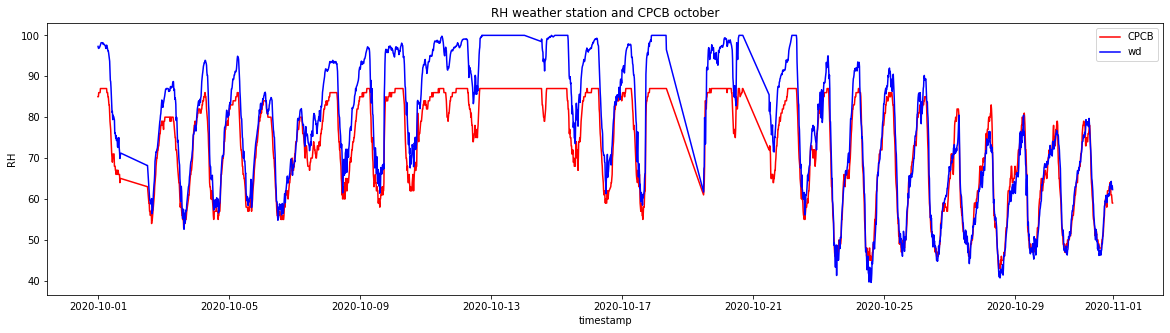

In [176]:
x = cwd['created_at']
y3_r = cwd['RH_x']
y4_r = cwd['RH_y']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_r, 'r') 
plt.plot(x, y4_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('RH')
plt.legend(["CPCB", 'wd'])
plt.title('RH weather station and CPCB october')
plt.show()

In [124]:
cwd = cwd.dropna()
datatypes = cwd.dtypes 
  
# Print the data types 
# of each column 
datatypes


created_at     datetime64[ns]
PM10                    int64
PM2.5                   int64
RH_x                    int64
Temp                  float64
RH_y                  float64
Temperature           float64
dtype: object

In [123]:
cwd['Temp'] = cwd.Temp.astype(float)

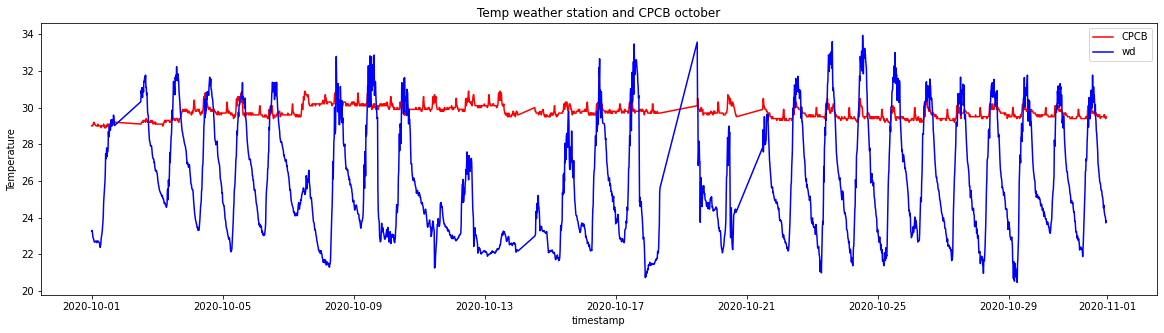

In [178]:
x = cwd['created_at']
y3_r = cwd['Temp']
y4_r = cwd['Temperature']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_r, 'r') 
plt.plot(x, y4_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('Temperature')
plt.legend(["CPCB", 'wd'])
plt.title('Temp weather station and CPCB october')
plt.show()

In [89]:
nwd = pd.merge(lc2, wd, on = 'created_at', how = 'inner')

In [90]:
nwd

created_at  PM10_2  PM2.5_2   RH_2  Temp_2  CO_2  NO2_2 NH3_2  \
0     2020-10-09 11:53:00    57.5     51.6  74.86   27.99  1.23   0.33  0.11   
1     2020-10-09 11:54:00    57.5     51.8  74.86   27.96  1.17   0.36  0.09   
2     2020-10-09 11:55:00    58.1     52.3  74.92   27.93  1.11   0.38  0.09   
3     2020-10-09 11:56:00    58.0     52.2  74.94   27.89  1.06   0.40  0.08   
4     2020-10-09 12:04:00    59.3     53.4  73.62   28.29   1.4   0.33  0.13   
...                   ...     ...      ...    ...     ...   ...    ...   ...   
69757 2020-12-01 13:19:00    22.2     20.1  38.62   31.90  0.48  10.05  0.01   
69758 2020-12-01 13:20:00    21.4     19.3  38.39   31.97  0.48  10.05  0.01   
69759 2020-12-01 13:21:00    21.8     19.6  37.98   32.07  0.48  10.19  0.01   
69760 2020-12-01 13:22:00    21.9     19.8  37.82   32.10  0.48  10.34  0.01   
69761 2020-12-01 13:23:00    21.5     19.4  38.01   32.10  0.48  10.05  0.01   

         RH  Temperature  
0      67.3        31.77  
1      66.7        31.54  
2      67.4        31.59  
3      66.4        31.77  
4      67.0        32.48  
...     ...          ...  
69757  46.2        28.72  
69758  46.8        28.87  
69759  45.6        28.72  
69760  45.4        28.44  
69761  45.9        28.12  

[69762 rows x 10 columns]

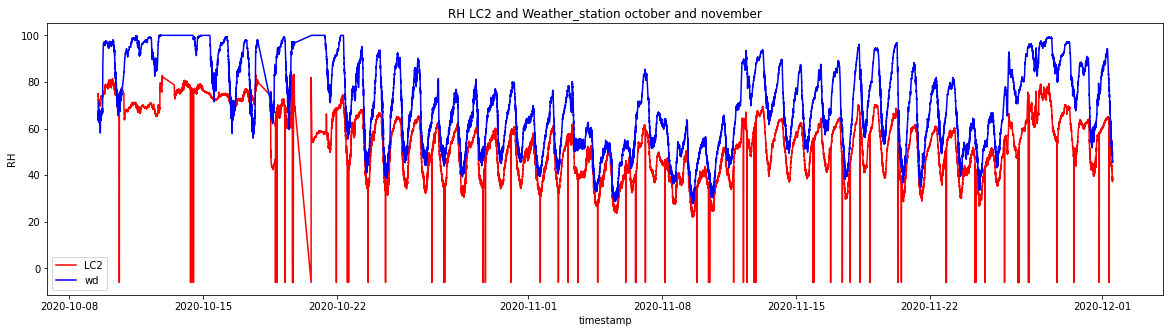

In [103]:
x = nwd['created_at']
y3_r = nwd['RH_2']
y4_r = nwd['RH']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_r, 'r') 
plt.plot(x, y4_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('RH')
plt.legend(["LC2", 'wd'])
plt.title('RH LC2 and Weather_station october and november')
plt.show()

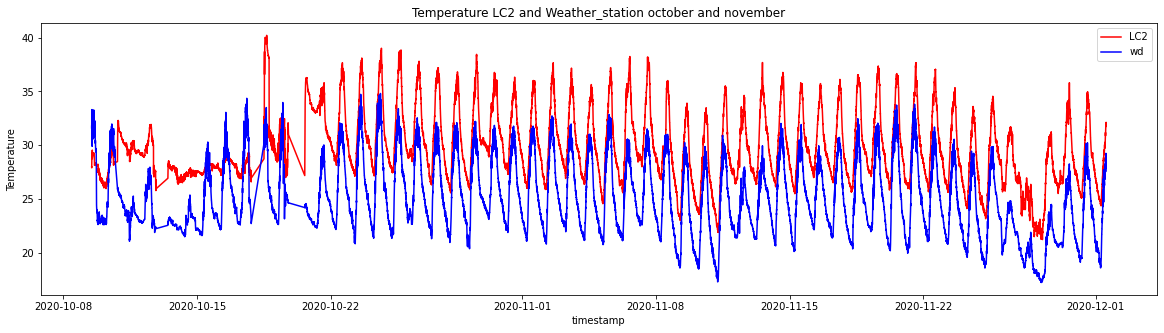

In [190]:
nwd_1 = nwd[nwd['Temp_2'] < 45]
nwd_1 = nwd_1[nwd_1['Temp_2'] > 0]

x = nwd_1['created_at']
y3_r = nwd_1['Temp_2']
y4_r = nwd_1['Temperature']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_r, 'r') 
plt.plot(x, y4_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('Temperature')
plt.legend(["LC2", 'wd'])
plt.title('Temperature LC2 and Weather_station october and november')
plt.show()

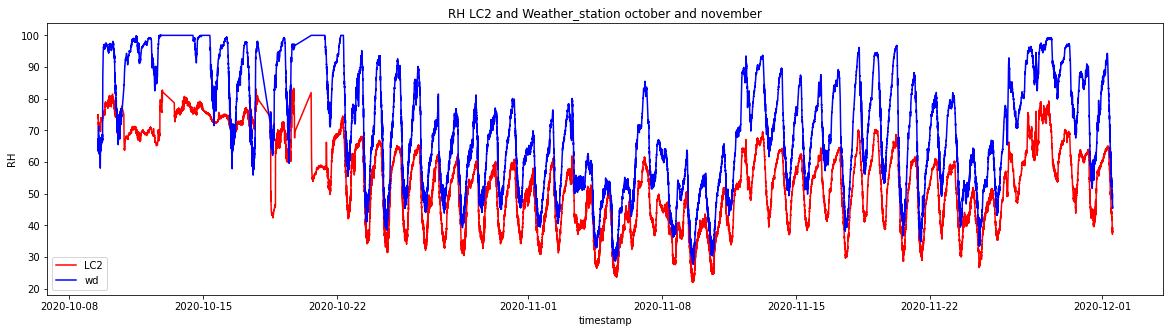

In [191]:
x = nwd_1['created_at']
y3_r = nwd_1['RH_2']
y4_r = nwd_1['RH']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_r, 'r') 
plt.plot(x, y4_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('RH')
plt.legend(["LC2", 'wd'])
plt.title('RH LC2 and Weather_station october and november')
plt.show()

In [113]:
nwd1 = pd.merge(lc3, wd, on = 'created_at', how = 'inner')

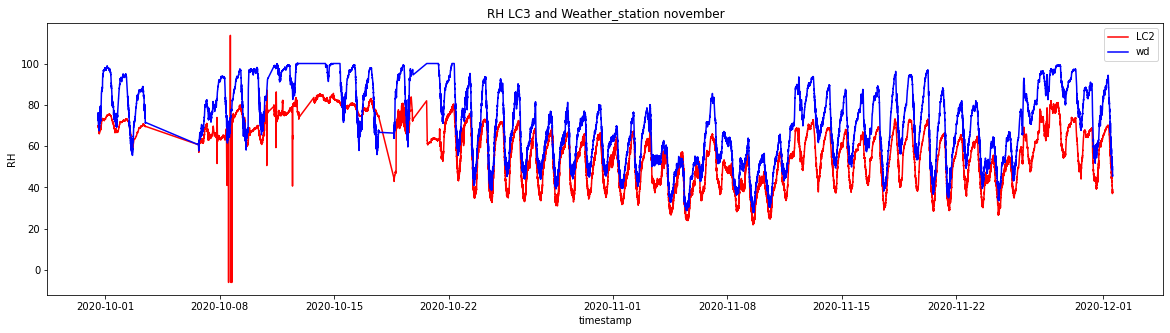

In [114]:
x = nwd1['created_at']
y3_r = nwd1['RH_3']
y4_r = nwd1['RH']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_r, 'r') 
plt.plot(x, y4_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('RH')
plt.legend(["LC2", 'wd'])
plt.title('RH LC3 and Weather_station november')
plt.show()

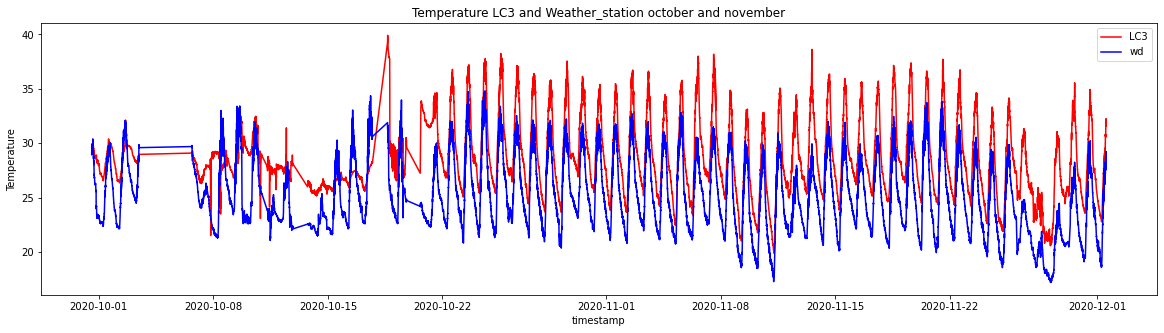

In [188]:
nwd1_1 = nwd1[nwd1['Temp_3'] < 40]
nwd1_1 = nwd1_1[nwd1_1['Temp_3'] > 0]
x = nwd1_1['created_at']
y3_r = nwd1_1['Temp_3']
y4_r = nwd1_1['Temperature']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_r, 'r') 
plt.plot(x, y4_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('Temperature')
plt.legend(["LC3", 'wd'])
plt.title('Temperature LC3 and Weather_station october and november')
plt.show()

In [182]:
cwd1 = pd.merge(cpcb_nov, wd, on = 'created_at', how = 'inner')

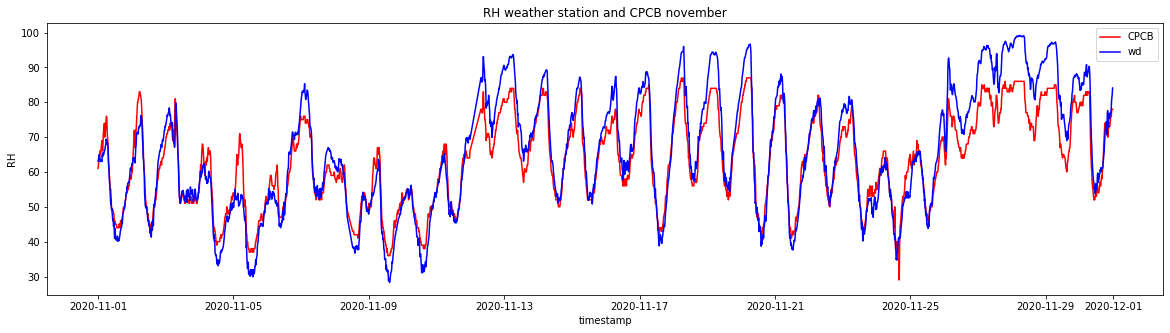

In [183]:
x = cwd1['created_at']
y3_r = cwd1['RH_x']
y4_r = cwd1['RH_y']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_r, 'r') 
plt.plot(x, y4_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('RH')
plt.legend(["CPCB", 'wd'])
plt.title('RH weather station and CPCB november')
plt.show()

In [136]:
cwd1 = cwd1.dropna()
datatypes = cwd1.dtypes 
  
# Print the data types 
# of each column 
datatypes


created_at     datetime64[ns]
PM10                    int64
PM2.5                   int64
RH_x                    int64
Temp                   object
RH_y                  float64
Temperature           float64
dtype: object

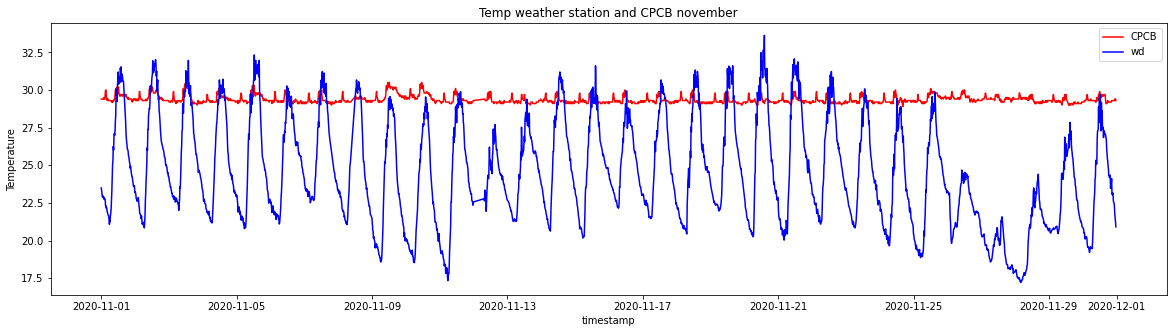

In [185]:
x = cwd1['created_at']
y3_r = cwd1['Temp']
y4_r = cwd1['Temperature']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_r, 'r') 
plt.plot(x, y4_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('Temperature')
plt.legend(["CPCB", 'wd'])
plt.title('Temp weather station and CPCB november')
plt.show()

In [ ]:
df['time'] = df['full_date'].dt.time

In [314]:
cpcb_oct =  pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\CPCB_oct.csv")

In [315]:
cpcb_oct

created_at  PM2.5    PM10    NO2    CO  Ozone   Temp     RH    WS
0    01-10-2020 01:00  35.50   51.75  20.55  0.21    NaN  29.00  85.50  0.30
1    01-10-2020 02:00  33.00   50.25  20.50  0.21    NaN  29.12  86.25  0.32
2    01-10-2020 03:00  30.00   48.00  23.05  0.21    NaN  29.10  87.00  0.40
3    01-10-2020 04:00  37.25   62.75  22.10  0.23    NaN  29.00  87.00  0.30
4    01-10-2020 05:00  41.00   56.25  20.88  0.28    NaN  29.02  87.00  0.38
..                ...    ...     ...    ...   ...    ...    ...    ...   ...
721  31-10-2020 21:00  85.00  181.25  49.60  0.93  44.45  29.50  62.00  0.30
722  31-10-2020 22:00  79.75  177.25  50.67  0.96  42.62  29.52  63.50  0.30
723  31-10-2020 23:00  76.25  173.75  46.48  0.82  56.77  29.52  61.75  0.30
724  01-11-2020 00:00  86.00  179.00  42.23  0.70  67.05  29.45  59.25  0.30
725  01-11-2020 00:00  73.00  172.00  40.95  0.55  62.55  29.40  61.50  0.30

[726 rows x 9 columns]

In [317]:
cpcb_oct['created_at'] = pd.to_datetime(cpcb_oct['created_at'], dayfirst = True)

In [318]:
cpcb_oct['time'] = cpcb_oct['created_at'].dt.time

In [321]:
cpcb_oct['time'] = cpcb_oct['time'].astype(str) 

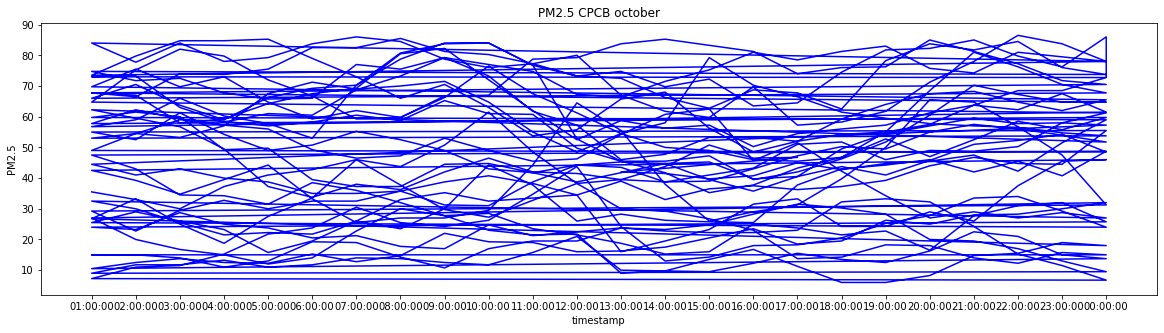

In [322]:
x = cpcb_oct['time']
#y1_T = oct2['PM2.5']
y2_T = cpcb_oct['PM2.5']
fig= plt.figure(figsize=(20,5))
#plt.plot(x, y1_T, 'r') 
plt.plot(x, y2_T, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
#plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 CPCB october')
plt.show()

In [323]:
cpcb_oct['Day'] = cpcb_oct['created_at'].dt.day_name()


In [324]:
cpcb_oct

created_at  PM2.5    PM10    NO2    CO  Ozone   Temp     RH  \
0   2020-10-01 01:00:00  35.50   51.75  20.55  0.21    NaN  29.00  85.50   
1   2020-10-01 02:00:00  33.00   50.25  20.50  0.21    NaN  29.12  86.25   
2   2020-10-01 03:00:00  30.00   48.00  23.05  0.21    NaN  29.10  87.00   
3   2020-10-01 04:00:00  37.25   62.75  22.10  0.23    NaN  29.00  87.00   
4   2020-10-01 05:00:00  41.00   56.25  20.88  0.28    NaN  29.02  87.00   
..                  ...    ...     ...    ...   ...    ...    ...    ...   
721 2020-10-31 21:00:00  85.00  181.25  49.60  0.93  44.45  29.50  62.00   
722 2020-10-31 22:00:00  79.75  177.25  50.67  0.96  42.62  29.52  63.50   
723 2020-10-31 23:00:00  76.25  173.75  46.48  0.82  56.77  29.52  61.75   
724 2020-11-01 00:00:00  86.00  179.00  42.23  0.70  67.05  29.45  59.25   
725 2020-11-01 00:00:00  73.00  172.00  40.95  0.55  62.55  29.40  61.50   

       WS      time       Day  
0    0.30  01:00:00  Thursday  
1    0.32  02:00:00  Thursday  
2    0.40  03:00:00  Thursday  
3    0.30  04:00:00  Thursday  
4    0.38  05:00:00  Thursday  
..    ...       ...       ...  
721  0.30  21:00:00  Saturday  
722  0.30  22:00:00  Saturday  
723  0.30  23:00:00  Saturday  
724  0.30  00:00:00    Sunday  
725  0.30  00:00:00    Sunday  

[726 rows x 11 columns]

In [334]:
cpcb_oct['Date'] = cpcb_oct['created_at'].dt.date

In [335]:
cpcb_oct

created_at  PM2.5    PM10    NO2    CO  Ozone   Temp     RH  \
0   2020-10-01 01:00:00  35.50   51.75  20.55  0.21    NaN  29.00  85.50   
1   2020-10-01 02:00:00  33.00   50.25  20.50  0.21    NaN  29.12  86.25   
2   2020-10-01 03:00:00  30.00   48.00  23.05  0.21    NaN  29.10  87.00   
3   2020-10-01 04:00:00  37.25   62.75  22.10  0.23    NaN  29.00  87.00   
4   2020-10-01 05:00:00  41.00   56.25  20.88  0.28    NaN  29.02  87.00   
..                  ...    ...     ...    ...   ...    ...    ...    ...   
721 2020-10-31 21:00:00  85.00  181.25  49.60  0.93  44.45  29.50  62.00   
722 2020-10-31 22:00:00  79.75  177.25  50.67  0.96  42.62  29.52  63.50   
723 2020-10-31 23:00:00  76.25  173.75  46.48  0.82  56.77  29.52  61.75   
724 2020-11-01 00:00:00  86.00  179.00  42.23  0.70  67.05  29.45  59.25   
725 2020-11-01 00:00:00  73.00  172.00  40.95  0.55  62.55  29.40  61.50   

       WS      time       Day        Date  
0    0.30  01:00:00  Thursday  2020-10-01  
1    0.32  02:00:00  Thursday  2020-10-01  
2    0.40  03:00:00  Thursday  2020-10-01  
3    0.30  04:00:00  Thursday  2020-10-01  
4    0.38  05:00:00  Thursday  2020-10-01  
..    ...       ...       ...         ...  
721  0.30  21:00:00  Saturday  2020-10-31  
722  0.30  22:00:00  Saturday  2020-10-31  
723  0.30  23:00:00  Saturday  2020-10-31  
724  0.30  00:00:00    Sunday  2020-11-01  
725  0.30  00:00:00    Sunday  2020-11-01  

[726 rows x 12 columns]

In [336]:
mon_cpcb_oct = cpcb_oct[cpcb_oct['Day'] == 'Monday']

In [337]:
mon_cpcb_oct

created_at  PM2.5    PM10    NO2    CO  Ozone   Temp     RH  \
76  2020-10-05 00:00:00  57.25  113.50  21.68  0.42  17.50  29.67  79.50   
77  2020-10-05 01:00:00  44.50   73.25  19.52  0.42  15.07  29.70  81.75   
78  2020-10-05 02:00:00  41.00   66.00  21.43  0.34  15.80  29.70  83.00   
79  2020-10-05 03:00:00  43.00   71.00  24.88  0.31  14.70  29.73  83.00   
80  2020-10-05 04:00:00  40.00   78.75  24.73  0.31  18.95  30.10  84.00   
..                  ...    ...     ...    ...   ...    ...    ...    ...   
599 2020-10-26 19:00:00  51.75  123.25  38.07  0.63  50.10  29.58  56.25   
600 2020-10-26 20:00:00  60.50  137.75  42.53  0.76  44.40  29.45  57.50   
601 2020-10-26 21:00:00  70.25  144.25  42.77  0.70  48.75  29.40  58.00   
602 2020-10-26 22:00:00  67.25  145.25  39.03  0.63  56.55  29.40  58.00   
603 2020-10-26 23:00:00  64.75  137.00  36.92  0.54  63.18  29.33  57.50   

       WS      time     Day        Date  
76   0.30  00:00:00  Monday  2020-10-05  
77   0.30  01:00:00  Monday  2020-10-05  
78   0.30  02:00:00  Monday  2020-10-05  
79   0.30  03:00:00  Monday  2020-10-05  
80   0.35  04:00:00  Monday  2020-10-05  
..    ...       ...     ...         ...  
599  0.40  19:00:00  Monday  2020-10-26  
600  0.43  20:00:00  Monday  2020-10-26  
601  0.32  21:00:00  Monday  2020-10-26  
602  0.55  22:00:00  Monday  2020-10-26  
603  0.62  23:00:00  Monday  2020-10-26  

[96 rows x 12 columns]

In [338]:
tue_cpcb_oct = cpcb_oct[cpcb_oct['Day'] == 'Tuesday']
wed_cpcb_oct = cpcb_oct[cpcb_oct['Day'] == 'Wednesday']
thur_cpcb_oct = cpcb_oct[cpcb_oct['Day'] == 'Thursday']
fri_cpcb_oct = cpcb_oct[cpcb_oct['Day'] == 'Friday']
sat_cpcb_oct = cpcb_oct[cpcb_oct['Day'] == 'Saturday']
sun_cpcb_oct = cpcb_oct[cpcb_oct['Day'] == 'Sunday']


In [349]:
tue_cpcb_oct

created_at  PM2.5    PM10    NO2    CO  Ozone   Temp     RH  \
100 2020-10-06 00:00:00  55.50  109.50  26.97  0.59   8.05  29.60  81.00   
101 2020-10-06 01:00:00  55.00  110.00  24.40  0.53   6.58  29.60  82.50   
102 2020-10-06 02:00:00  52.50  102.25  25.00  0.47   8.45  29.60  83.75   
103 2020-10-06 03:00:00  61.25  113.50  25.70  0.45   9.50  29.62  84.00   
104 2020-10-06 04:00:00  54.25  105.25  22.35  0.41  13.50  29.92  82.75   
..                  ...    ...     ...    ...   ...    ...    ...    ...   
623 2020-10-27 19:00:00  57.25  128.75  41.45  0.70  53.10  29.70  58.50   
624 2020-10-27 20:00:00  61.25  122.50  44.90  0.76  45.48  29.55  59.00   
625 2020-10-27 21:00:00  63.75  124.25  46.20  0.68  41.05  29.50  61.25   
626 2020-10-27 22:00:00  68.50  126.50  46.77  0.67  42.00  29.50  62.75   
627 2020-10-27 23:00:00  68.50  132.75  48.88  0.70  31.68  29.50  67.25   

       WS      time      Day        Date  
100  0.30  00:00:00  Tuesday  2020-10-06  
101  0.30  01:00:00  Tuesday  2020-10-06  
102  0.30  02:00:00  Tuesday  2020-10-06  
103  0.30  03:00:00  Tuesday  2020-10-06  
104  0.30  04:00:00  Tuesday  2020-10-06  
..    ...       ...      ...         ...  
623  0.32  19:00:00  Tuesday  2020-10-27  
624  0.32  20:00:00  Tuesday  2020-10-27  
625  0.30  21:00:00  Tuesday  2020-10-27  
626  0.30  22:00:00  Tuesday  2020-10-27  
627  0.30  23:00:00  Tuesday  2020-10-27  

[96 rows x 12 columns]

In [341]:
mon_cpcb_oct.to_csv('mon_cpcb_oct.csv')

In [350]:
tue_cpcb_oct.to_csv('tue_cpcb_oct.csv')
wed_cpcb_oct.to_csv('wed_cpcb_oct.csv')
thur_cpcb_oct.to_csv('thur_cpcb_oct.csv')
fri_cpcb_oct.to_csv('fri_cpcb_oct.csv')
sat_cpcb_oct.to_csv('sat_cpcb_oct.csv')
sun_cpcb_oct.to_csv('sun_cpcb_oct.csv')